Before beginning, we will set the options in `JupyterLab` to define the width and height of plots.

In [1]:
# Set plot options in Jupyter Lab
options(repr.plot.width = 10)
options(repr.plot.height = 5)

---

---

---

# Univariate Regression Tasks with `dt4` dataset

In [2]:
print(paste0("Last updated: ", Sys.Date()))

[1] "Last updated: 2018-10-13"



We will show an example of how to carry out the tasks specified in the task file on one of the datasets.

In [3]:
dt4 <- read.csv(file = "http://www.principlesofeconometrics.com/poe5/data/csv/cps5_small.csv", 
                sep = ",", dec = ".", header = TRUE)

In [4]:
head(dt4)

black educ exper faminc female metro midwest south wage  west
1 0     13   45         0 1      1     0       0     44.44 1   
2 0     14   25     45351 1      1     1       0     16.00 0   
3 0     18   27     91946 1      1     0       0     15.38 0   
4 0     13   42     48370 0      1     1       0     13.54 0   
5 0     13   41     10000 1      1     0       0     25.00 1   
6 0     16   26    151308 1      1     0       0     24.05 0

We want to analyse, whether education (`educ` column) affects the wage (`wage` column) of a person.

---

---

---

# TASK 1
## - Plot the scatter plot of the dependent variable Y and the independent variable X. 
## - Do the variables look correlated? Calculate the correlation between X and Y to verify.

To make it easier to follow, we will take only the columns that we need from the dataset

In [5]:
educ <- dt4$educ
wage <- dt4$wage

We will begin by plotting the scatterplot of $Y$ on $X$ (we will plot the histograms of $Y$ and $X$ in a separate task):

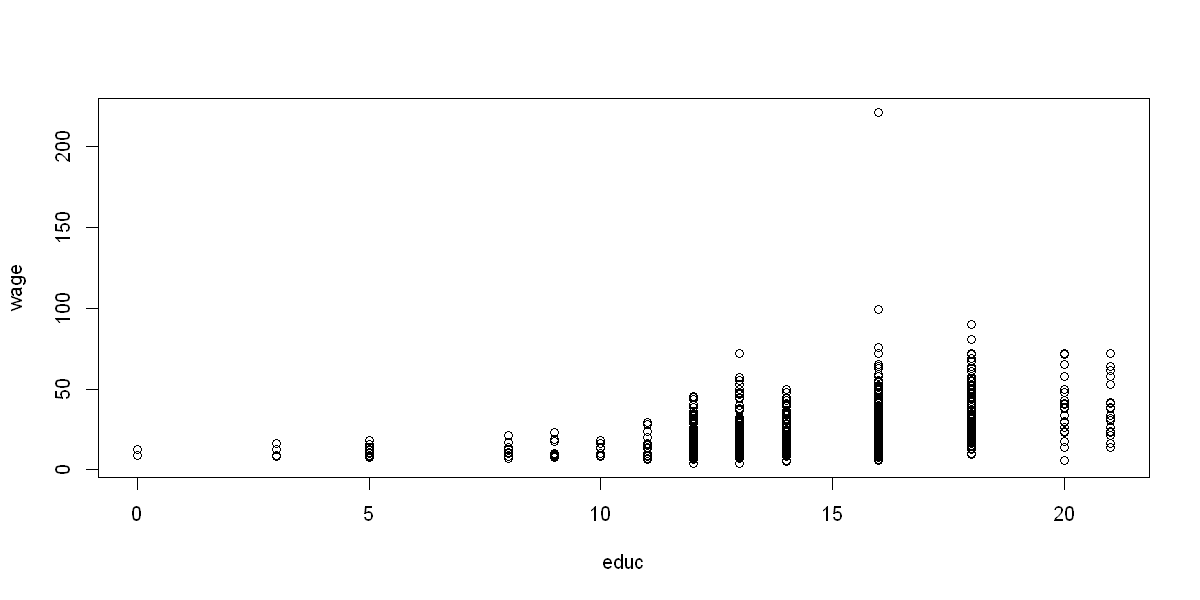

In [6]:
plot(educ, wage)

It appears that for larger values of `educ` there are larger values of `wage`. So $Y$ and $X$ appear to be correlated. the correlation between $Y$ and $X$ is:

In [7]:
cor(wage, educ)

[1] 0.4553321

We also note that there are fewer observations for people, whose education is less than 10 years:

In [8]:
sum(educ < 10)

[1] 43

In [9]:
sum(educ >= 10)

[1] 1157

This could mean that people with less than 10 years of education are **underrepresented** in our dataset.

# TASK 2
## - Specify the regression in a mathematical formula notation. 
## - What coefficient sign do you expect $\beta_1$ to have? Explain.

We begin by assuming that the relationship between wage and education can be defined by a linear regression:
$$
\text{wage} = \beta_0 + \beta_1 \cdot \text{educ} + \epsilon
$$
We expect that the more years one spends in education, the more qualified they are for higher position (i.e. higher-paying) jobs. As such, the hourly `wage`, should increase with more years spent on studying. So, we expect $\beta_1 > 0$.

# TASK 3
## - Estimate the regression via OLS without using the built-in OLS estimation functions. 
## - Is the sign on β1 the same as you expected?

We will estimate the parameters "by-hand" by using the OLS formula:
$$
\widehat{\boldsymbol{\beta}} = \left( \mathbf{X}^\top \mathbf{X}\right)^{-1} \mathbf{X}^\top \mathbf{Y}
$$
where: 

- $\mathbf{Y} = [Y_1,...,Y_N]^\top$, 
- $\mathbf{X} = \begin{bmatrix} 1 & X_1 \\ 1 & X_2 \\ \vdots & \vdots \\ 1 & X_N \end{bmatrix}$
- $\boldsymbol{\varepsilon} = [\epsilon_1,...,\epsilon_N]^\top$, 
- $\boldsymbol{\beta} =[ \beta_0, \beta_1]^\top$,

Let's begin by estimating separate components of our OLS formula.

$\mathbf{X}$:

In [10]:
x_mat <- cbind(1, educ)
head(x_mat)

educ
[1,] 1 13  
[2,] 1 14  
[3,] 1 18  
[4,] 1 13  
[5,] 1 13  
[6,] 1 16

$\mathbf{X}^\top \mathbf{X}$:

In [11]:
xtx <- t(x_mat) %*% x_mat
head(xtx)

educ  
      1200  17043
educ 17043 252073

We can veryfy that we have correctly multiplied the matrices by looking at the diagonal elements in the matrix - they should be $\sum_{i = 1}^N 1$ and $\sum_{i = 1}^N \text{educ}_i$:

In [12]:
sum(rep(1, length(educ)))
sum(educ)

[1] 1200

[1] 17043

$\left( \mathbf{X}^\top \mathbf{X}\right)^{-1}$:

In [13]:
xtx_inv <- solve(xtx)

$\mathbf{X}^\top \mathbf{Y}$:

In [14]:
xty <- t(x_mat) %*% wage

Finally, we can multiply both terms to estimate the parameters:

In [15]:
beta_est_linear <- xtx_inv %*% xty
print(beta_est_linear)

           [,1]
     -10.399959
educ   2.396761


We see that the sign of `educ` is positive, which is in line with ou assumptions (which are based on economic theory).

# TASK 4
## - Calculate the standard errors of the estimated coefficients.

In order to estimate the standard errors, we first need to estimate the variance:
$$
\widehat{\mathbb{V}{\rm ar}} (\widehat{\boldsymbol{\beta}}) = 
\begin{bmatrix}
\widehat{\mathbb{V}{\rm ar}} (\widehat{\beta}_0) & \widehat{\mathbb{C}{\rm ov}} (\widehat{\beta}_0, \widehat{\beta}_1) \\
\widehat{\mathbb{C}{\rm ov}} (\widehat{\beta}_1, \widehat{\beta}_0) & \widehat{\mathbb{V}{\rm ar}} (\widehat{\beta}_1)
\end{bmatrix}
= \widehat{\sigma}^2 \left( \mathbf{X}^\top  \mathbf{X}\right)^{-1}
$$
where 

- the estiamted residual variance $\widehat{\sigma}^2 = \dfrac{1}{N-2} \sum_{i = 1}^N \widehat{\epsilon}_i^2$, 
- the residuals $\widehat{\epsilon}_i = Y - \widehat{Y}_i$
- the fitted values $\widehat{Y}_i = \beta_0 + \beta_1 X_i$


Then, the standard errors of the corresponding OLS estimators can be estimated as: $$\text{se}(\widehat{\beta}_i) = \sqrt{\widehat{\mathbb{V}{\rm ar}} (\mathbf{\widehat{\beta}_i})}$$ for $i = 0, 1$.

We begin by estimating the residual variance:

In [16]:
y_fit_linear <- beta_est_linear[1] + beta_est_linear[2] * educ
resid_linear <- wage - y_fit_linear
sigma2_est_linear <- (length(educ) - 2)^(-1) * sum((resid_linear)^2)
print(sigma2_est_linear)

[1] 183.6914


Now, we can estimate the OLS estimator variance-covariance matrix:

In [17]:
beta_est_linear_var <- sigma2_est_linear * solve(t(x_mat) %*% x_mat)

The standard errors are the square root of the diagonal elements of the estimated variance-covariance matrix of the parameters:

In [18]:
beta_se_linear <- sqrt(diag(beta_est_linear_var))
print(beta_se_linear)

               educ 
1.9624004 0.1353989 


# TASK 5
## - Write Down the estimated regression formula.

We first will print the estimated parameters and their standard errors in one table:

In [19]:
output1 <- data.frame(estimate = beta_est_linear, 
                      se = beta_se_linear)
round(output1, 4)

estimate se    
     -10.4000 1.9624
educ   2.3968 0.1354

Now we can write down the equation as:
$$
\underset{(se)}{\widehat{\text{wage}}} = \underset{(1.9624)}{-10.4000} + \underset{(0.1354 )}{2.3968} \cdot \text{educ}
$$

# TASK 6
## - Calculate the fitted values and plot the estimated regression alongside the data.

We have already calculated the fitted values in Task 4:

In [20]:
y_fit_linear <- beta_est_linear[1] + beta_est_linear[2] * educ

Now, we will plot the fitted values alongside the true values from the data sample. We will also needto **order the data** by $X$ - the reason is that when ploting a line, `R` will connect the values *as they are given in the dataset*:

In [21]:
head(t(educ))

[,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13] [,14]
[1,] 13   14   18   13   13   16   16   18   21   14    ...   16    16    14   
     [,15] [,16] [,17] [,18] [,19] [,20] [,21]
[1,] 18    12    13    16    16    14    10

we see that the first point will start at $X = 13$, then 14, 18 but then go back to 13. If we have a log-linear or any other model, where we transform $Y$, where our fitted values are not a straight line (when we "untransform" them), then the values will be incorrectly visualized. We can order the data by the value of $X$.

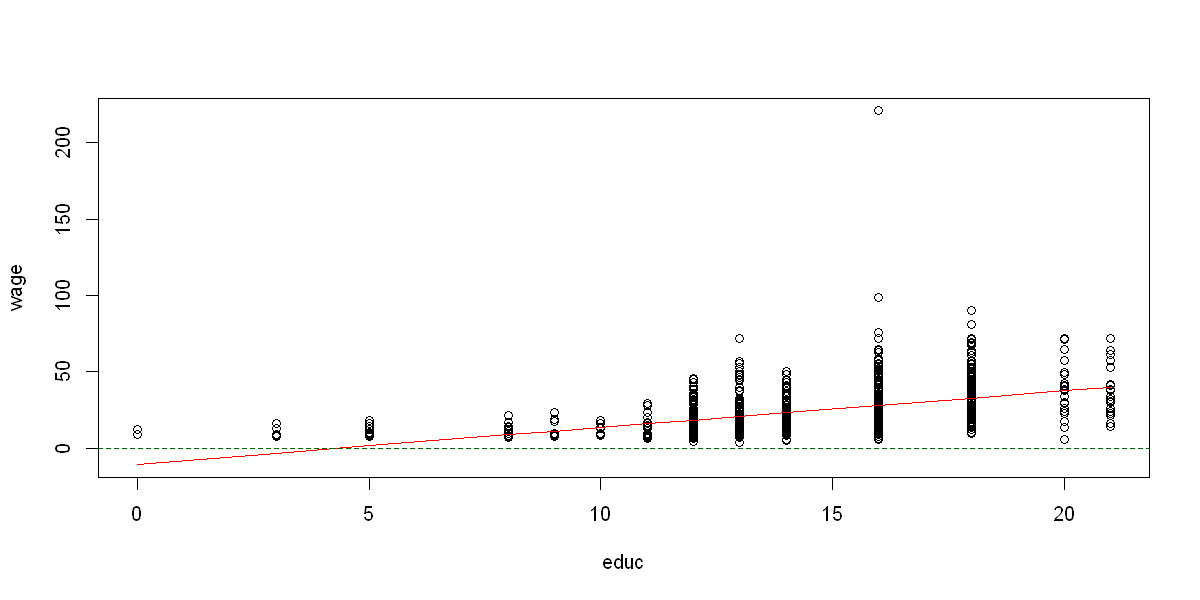

In [22]:
plot(educ, wage, ylim = c(-10, 220))
lines(educ[order(educ)], y_fit_linear[order(educ)], col = "red")
abline(h = 0, col = "darkgreen", lty = 2)

We note that for `educ` values less than 5, our fitted values for `wage` are **negative**. Since wage cannot be negative, and an education of less than 5 years is realistic (and because we have these values in our dataset), this is an indication that our model may not be good for this dataset.

# **Finally**: Use the built-in functions for OLS estimation and compare with your own results.

We will use the `lm()` function in `R` to automatically estimate the coefficients and standard errors:

In [23]:
lm_fit_linear <- lm(wage ~ educ)
summary(lm_fit_linear)$coefficients

Estimate   Std. Error t value   Pr(>|t|)    
(Intercept) -10.399959 1.9624004  -5.299611 1.380373e-07
educ          2.396761 0.1353989  17.701484 1.820416e-62

We see that the `Estimate` and `Std. Error` columns correspond to our manually calculated values.

# TASK 7
## - Examine the run-sequence plot of the dependent variable, Y.
## - Does the data appear random? Is the variance (and mean) the same throughout observations?

The run sequence plot can be used to plot values, *equally spaced**:

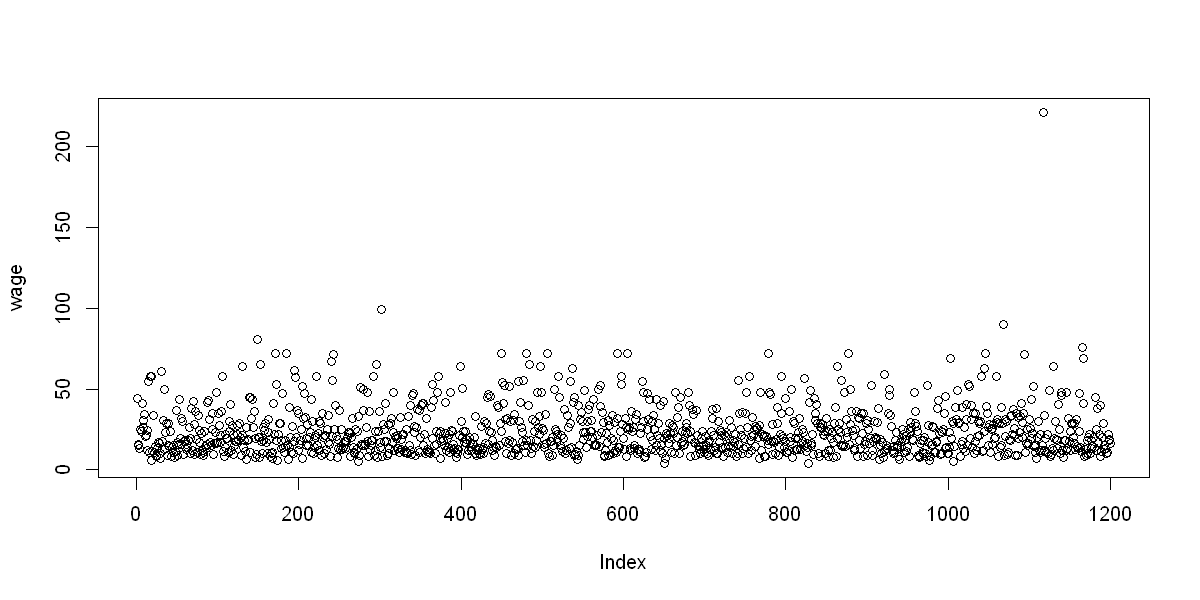

In [24]:
plot(wage)

This allows us to get a better overview of the data. In this case we see that:

- One value is a possible outlier - it's value is much higher than any other. In practice we may need to get a deeper look at the dataset - is that value due to an error, or maybe it is from someone who is underprepresented in our dataset (e.g. CEO's, some management positions, etc.);
- The values of `wage` are fluctuating - it appears that there mean and variance of the data is the same - hence we can consider `wage` to be a realization of random variables from some unknown distribution. 
- From the run-sequence plots we do not see any changes in variance, since we are examining cross-sectional data, where the order of the data does not matter, the one thing we can notice in our data - the distribution appears to be non-normal. The reason is that most values appear to be "clustered" around 25, but some are much higher. Since wage cannot be negative, this skews the distribution of the data.

# TASK 8
## - Examine the histogram of your dependent (Y) and independent (X) variables. 
## - Are there any variables that appear to have a non-normal distribution?

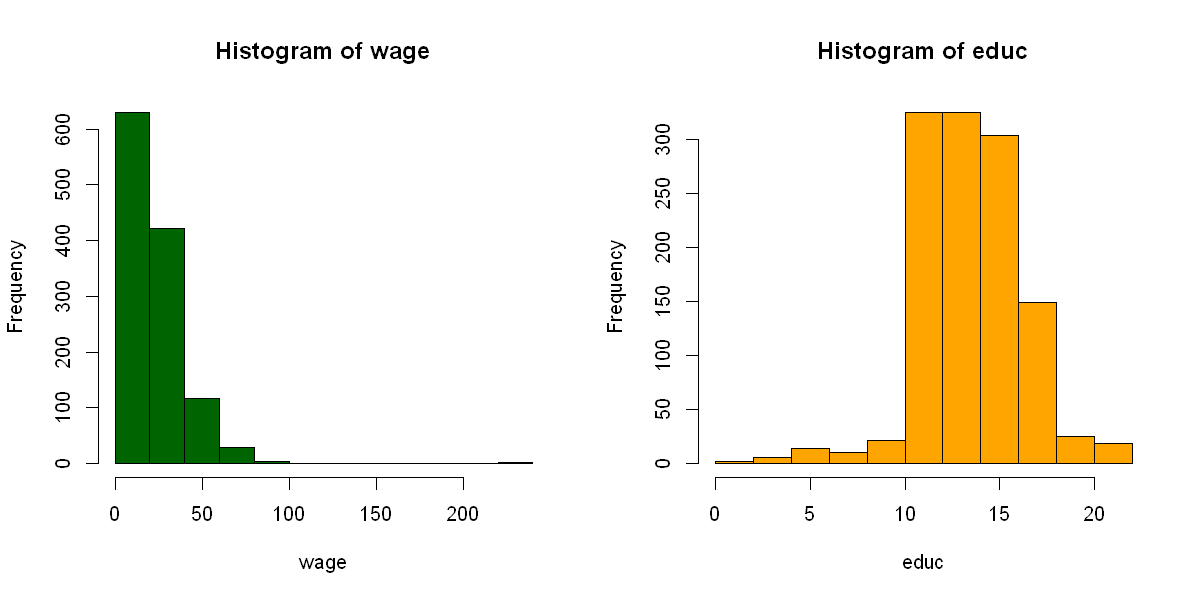

In [25]:
par(mfrow = c(1, 2))
hist(wage, col = "darkgreen")
hist(educ, col = "orange")

We see that the data for `wage` and `education` does not appear to be normal - the distributions of both `wage` and `educ` are skewed. For `wage` - there are more people with wages with values less than 50. 
For `educ` - there are more people with more than 10 years of education.

# TASK 9
## - Take another look at the scatter plot from **Task 1**
## - Could you specify at least one more linear regression but this time with transformed variable(-s)?

(Note: consider transformations either by scaling with a constant, by taking logarithms, or by taking the square of the independent variable)

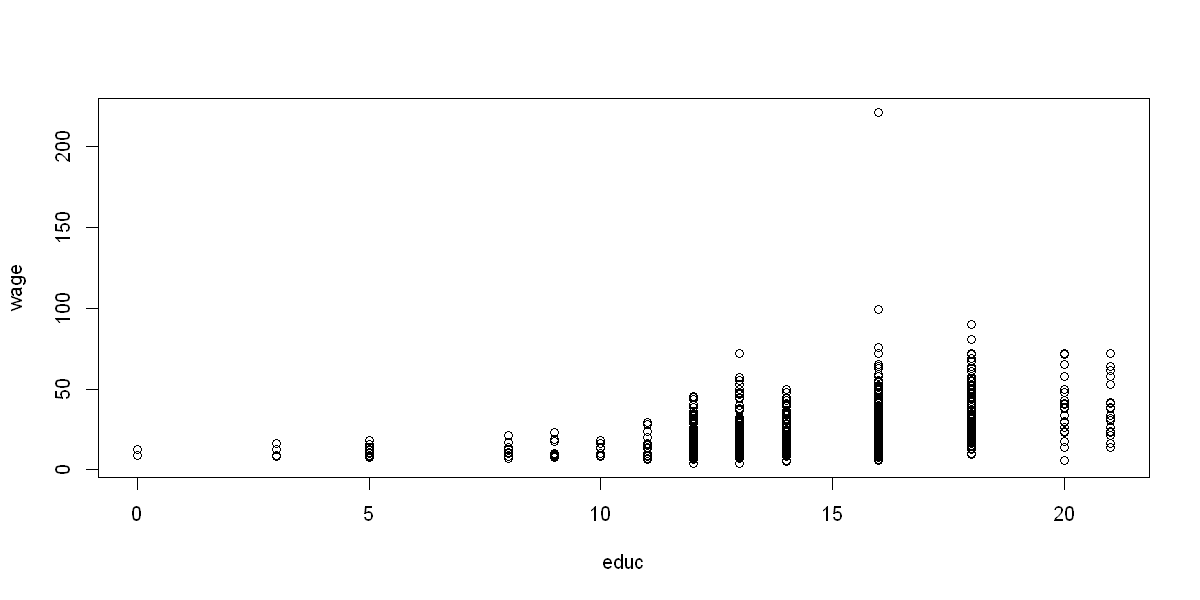

In [26]:
plot(educ, wage)

As we have seen before, our simple linear model is not precise when the value of`educ` is small. Furthermore, we know that `wage` does not have a normal distribution.

As we know, we can specify nonlinearities in the linear model as well to try to account for this:

- $\log(\text{wage}) = \beta_0 + \beta_1 \cdot \text{educ} + \epsilon$, where $\text{wage} > 0$;
- $\text{wage} = \beta_0 + \beta_1 \cdot \log(\text{educ}) + \epsilon$, where $\text{educ} > 0$;
- $\log(\text{wage}) = \beta_0 + \beta_1 \cdot \log(\text{educ}) + \epsilon$, where $\text{wage} > 0$, $\text{educ} > 0$;
- $\text{wage} = \beta_0 + \beta_1 \cdot \text{educ}^2 + \epsilon$

**Unfortunately**, if we look at the minimum value of `educ`:

In [27]:
min(educ)

[1] 0

We see that it is zero - so we cannot take logarithms of `educ`.

This leaves us with two possible alternative specification of a linear model:

- $\log(\text{wage}) = \beta_0 + \beta_1 \cdot \text{educ} + \epsilon$
- $\text{wage} = \beta_0 + \beta_1 \cdot \text{educ}^2 + \epsilon$

### We will estimate a log-linear model:

In [28]:
beta_est_loglin <- solve(t(x_mat) %*% x_mat) %*% t(x_mat) %*% log(wage)
print(beta_est_loglin)

           [,1]
     1.59683536
educ 0.09875341


Next, we will calculate the fitted values $\widehat{\log(\text{wage})}$ and residuals .

In [29]:
y_loglin_fit <- beta_est_loglin[1] + beta_est_loglin[2] * educ
resid_loglin <- log(wage) - y_loglin_fit

and the standard errors of the estimated parameters

In [30]:
sigma2_est_loglin <- (length(educ) - 2)^(-1) * sum((resid_loglin)^2)
beta_est_loglin_var <- sigma2_est_loglin * solve(t(x_mat) %*% x_mat)
beta_se_loglin <- sqrt(diag(beta_est_loglin_var))
#
output2 <- data.frame(estimate = beta_est_loglin, 
                      se = beta_se_loglin)
round(output2, 4)

estimate se    
     1.5968   0.0702
educ 0.0988   0.0048

So, the estimated log-linear model is:
$$
\underset{(se)}{\widehat{\log(\text{wage})}} = \underset{(0.0702)}{1.5968} + \underset{(0.0048)}{0.0988} \cdot \text{educ}
$$

## We will estimate a quadratic model:

We may make the assumption that for people, who already have spent more years studying, an additional year in education might  have a larger effect, comapred to an additional year of education for people, who did not spend as many years studying.

We will estimate the following model:
$$
\text{wage} = \beta_0 + \beta_1 \cdot \text{educ}^2 + \epsilon
$$

In [31]:
x_mat_2 <- cbind(1, educ^2)
beta_est_quad <- solve(t(x_mat_2) %*% x_mat_2) %*% t(x_mat_2) %*% wage
print(t(beta_est_quad))

         [,1]       [,2]
[1,] 4.916477 0.08913401


we can also do this with the built-in OLS estimation function

In [32]:
lm_fit_quad <- lm(wage ~ 1 + I(educ^2))
t(lm_fit_quad$coefficients)

(Intercept) I(educ^2) 
[1,] 4.916477    0.08913401

along with the estimates, we can also immediately test the hypothesis:
$$
\begin{aligned}
H_0&: \beta_1 = 0\\
H_1&: \beta_1 \neq 0
\end{aligned}
$$

In [33]:
summary(lm_fit_quad)$coefficients

Estimate   Std. Error  t value   Pr(>|t|)    
(Intercept) 4.91647729 1.091864113  4.502829 7.359564e-06
I(educ^2)   0.08913401 0.004858102 18.347497 1.862455e-66

Because the $p$-value in column `Pr(>|R|)` is less than 0.05, we reject the null hypothesis and are left with the alternative, that the coefficient $\widehat{\beta}_1$ is statistically significantly different from zero.

In [34]:
# Calculate the fitted values:
y_quad_fit <- lm_fit_quad$coefficients[1] + lm_fit_quad$coefficients[2] * educ^2

Furthermore, we can plot all of our current models and comapre them visually (to make it easier, we will not show all of the sample data, which we will limit with `ylim`):

In [35]:
# Set larger plot size:
options(repr.plot.width = 15)
options(repr.plot.height = 10)

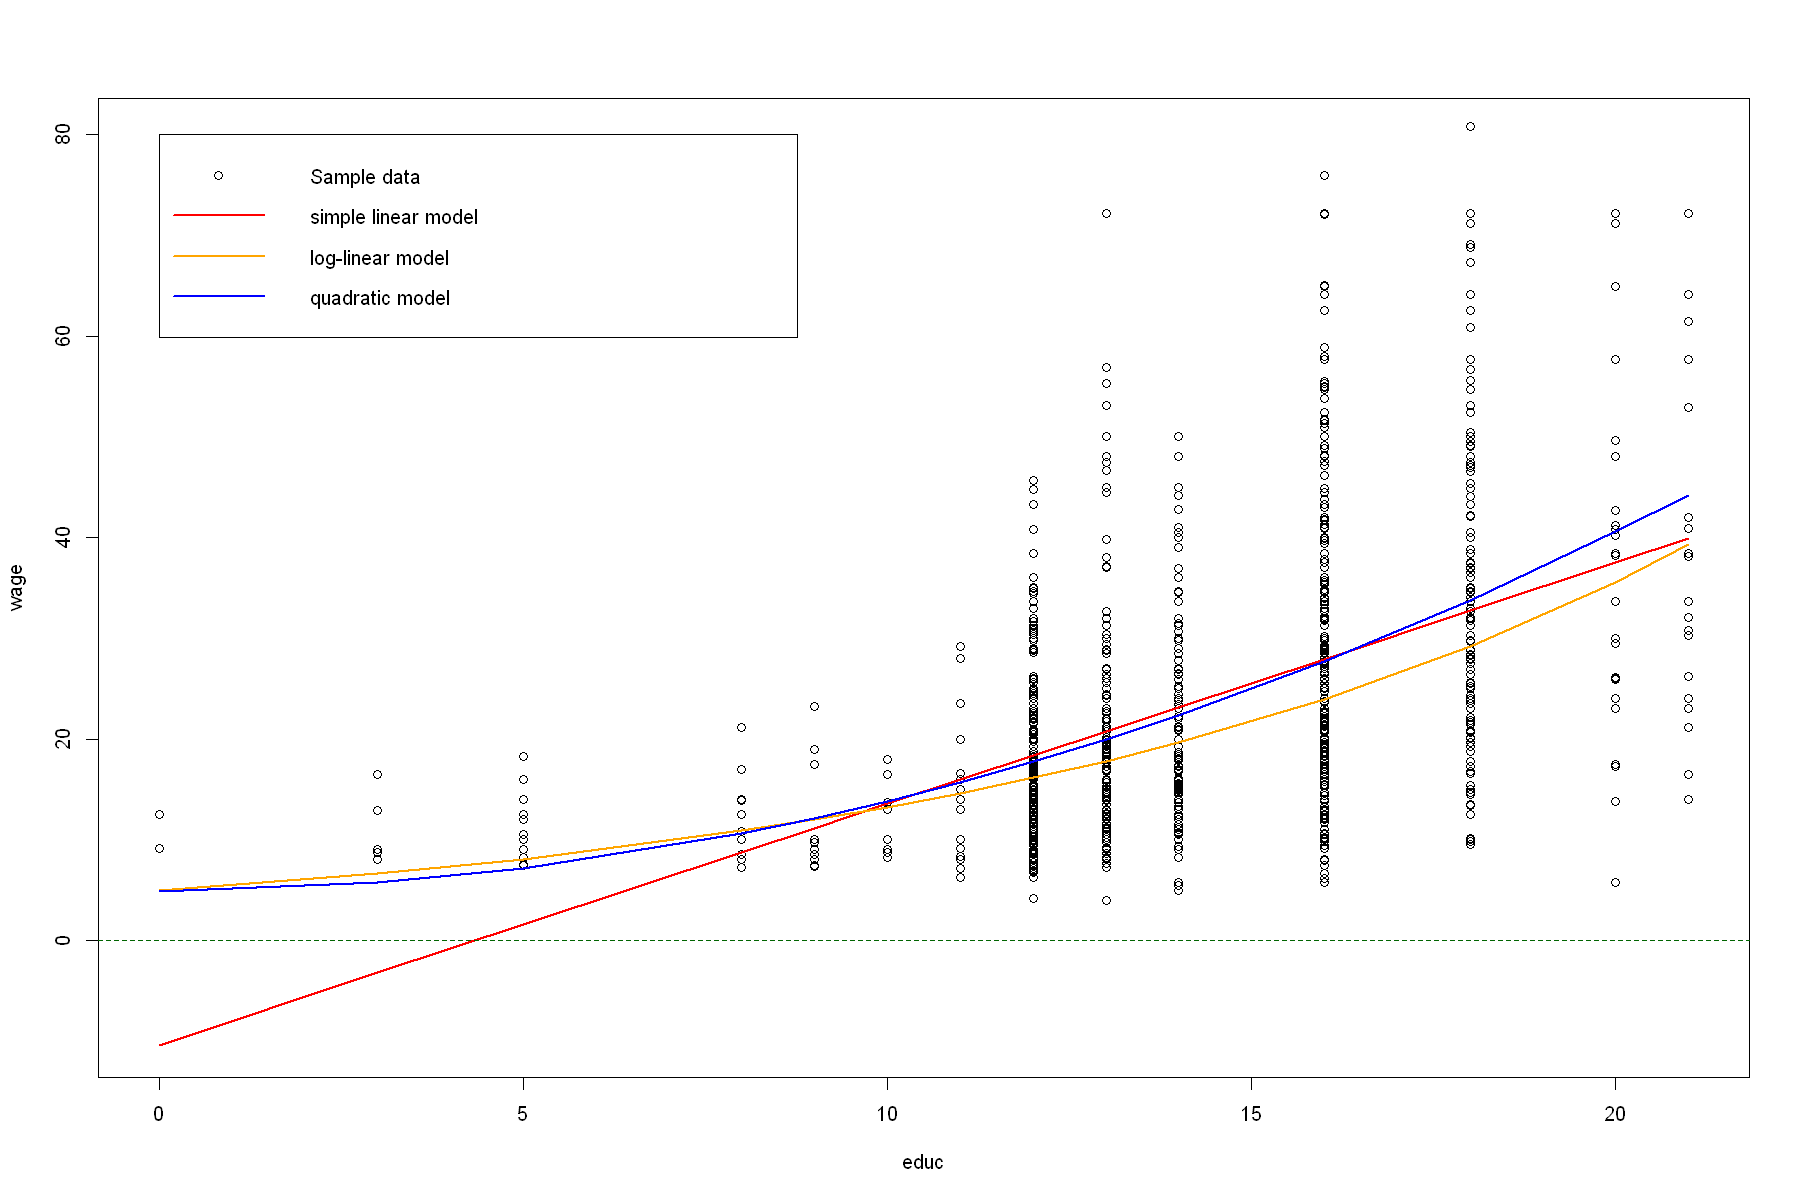

In [36]:
plot(educ, wage, ylim = c(-10, 80))
lines(educ[order(educ)], y_fit_linear[order(educ)], col = "red", lwd = 2)
lines(educ[order(educ)], exp(y_loglin_fit[order(educ)]), col = "orange", lwd = 2)
lines(educ[order(educ)], y_quad_fit[order(educ)], col = "blue", lwd = 2)
abline(h = 0, col = "darkgreen", lty = 2)
# Add a legend:
legend(x = 0, y = 80,
      legend = c("Sample data", "simple linear model", "log-linear model", "quadratic model"),
      lty = c(NA, 1, 1, 1), lwd = c(NA, 2, 2, 2), pch = c(1, NA, NA, NA), 
      col = c("black", "red", "orange", "blue"))

In [37]:
# Reset to smaller plot size for the remainder of this file:
options(repr.plot.width = 10)
options(repr.plot.height = 5)

We see that the quadratic model is somewhere in the middle between the linear and the log-linear model - the predicted values are greater than zero (which is better than the linear model and closer to the log-linear model specification), and the predicted values are vloser to the mean for `educ` between 15 and 20 (which is better than the log-linear model and closer to the linear model specification).

Our estimated quadratic model is:
$$
\underset{(se)}{\widehat{\text{wage}}} = \underset{(1.09186)}{4.9165} + \underset{(0.00486)}{0.08913} \cdot \text{educ}^2
$$

We can interpret the coefficient of `educ` as follows: education has a positive effect on wage, which is more pronounced for larger initial (or, base, or starting) values of education. 

Consider the following equations where some base education increases by one:
$$
\begin{aligned}
{\widehat{\text{wage}}^{(1)}} &= {4.9165} + {0.08913} \cdot \text{educ}^2\\
{\widehat{\text{wage}}^{(2)}} &= {4.9165} + {0.08913} \cdot (\text{educ} + 1)^2 \\
&= {4.9165} + {0.08913}\cdot \text{educ}^2 + 0.08913 \cdot (2 \cdot\text{educ} + 1)
\end{aligned}
$$

Then the change in `wage` from a one year increase in education is:
$$
\widehat{\text{wage}}^{(2)} - \widehat{\text{wage}}^{(1)} = 0.08913 \cdot (2 \cdot\text{educ} + 1)
$$

If education increased from `0` to `1` then wage increases by:

In [38]:
lm_fit_quad$coefficients[2] * (2 * 0 + 1)

I(educ^2) 
0.08913401

around `0.09` dollars per hour.

On the other hand, if education increases from `15` to `16`, then wage increases by:

In [39]:
lm_fit_quad$coefficients[2] * (2 * 15 + 1)

I(educ^2) 
 2.763154

roughly `2.76` dollars per hour.

We can verify this with the built-in functions as well:

In [40]:
tst <- predict(lm_fit_quad, newdata = data.frame(educ = c(0, 1)))
tst[2] - tst[1]

2 
0.08913401

In [41]:
tst <- predict(lm_fit_quad, newdata = data.frame(educ = c(15, 16)))
tst[2] - tst[1]

2 
2.763154

# TASK 10
## - Examine the residual run-sequence plots and histograms from regressions in **Task 3** and **Task 9** - which regressions appear to have residuals that are random (i.e. randomly dispersed around the horizontal axis)? 
## - Are there any regressions, where the residuals do not appear to be random? What can you say about those models in such cases (in regards to some of the linear regression model assumptions **(UR.1)-(UR.4)** and the signs of the coefficient $\beta_1$).

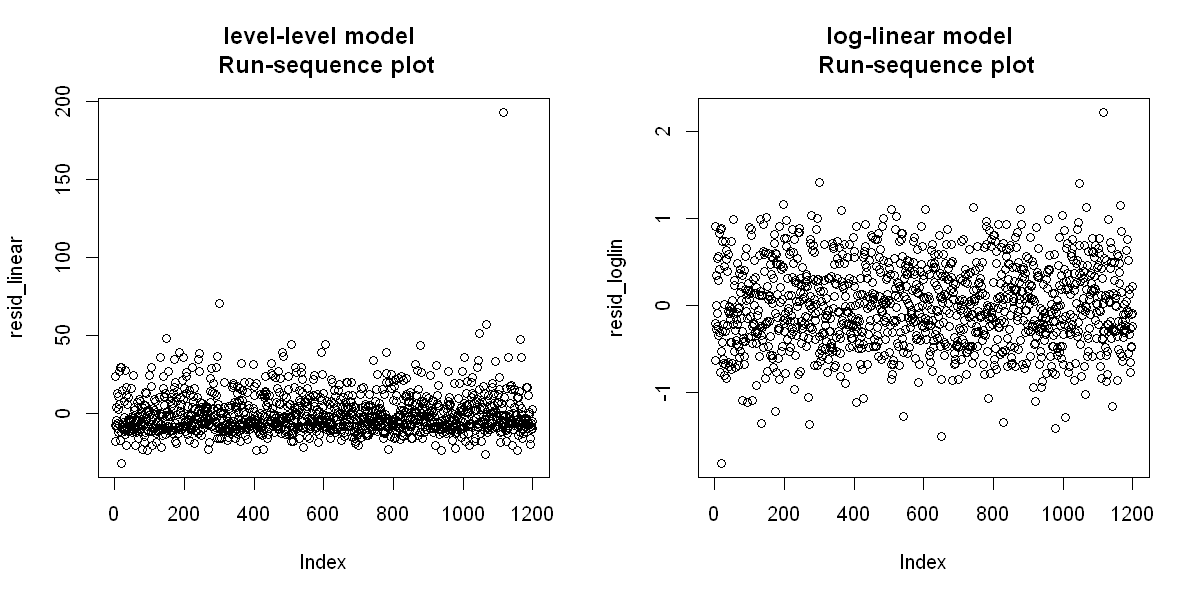

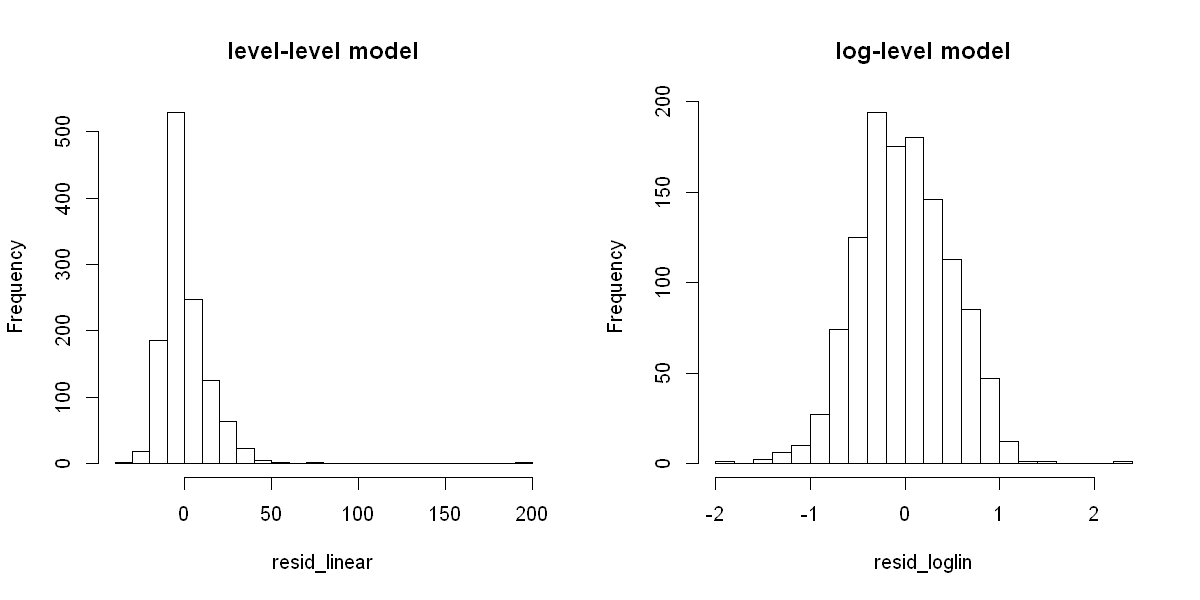

In [42]:
par(mfrow = c(1, 2))
plot(resid_linear, main = "level-level model \n Run-sequence plot")
plot(resid_loglin, main = "log-linear model \n Run-sequence plot")
hist(resid_linear, , main = "level-level model", breaks = 25)
hist(resid_loglin, , main = "log-level model", breaks = 25)

We will also plot the run-sequence plot of the reisuald on `educ` to see if the model performed

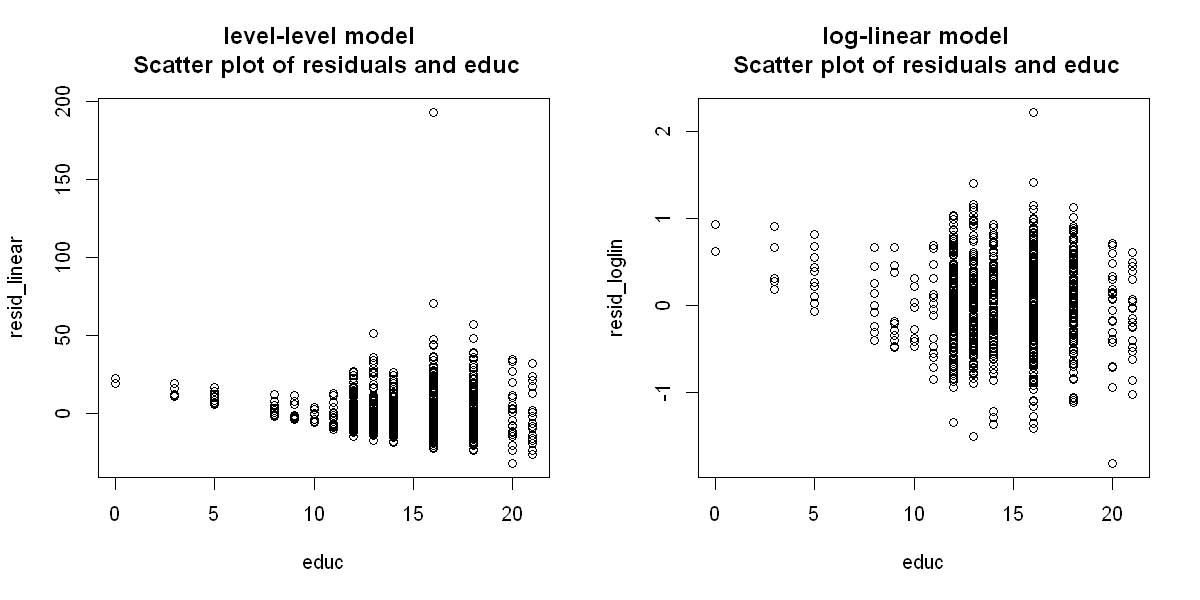

In [43]:
par(mfrow = c(1, 2))
plot(educ, resid_linear, main = "level-level model \n Scatter plot of residuals and educ")
plot(educ, resid_loglin, main = "log-linear model  \n Scatter plot of residuals and educ")

**Ideally**, we would want the residauls to be randomly scattered around zero on the vertical axis, which would suggest that our model captures any non-linearities in the data. They should also need to have the same variance, and to not have outliers

**In our case:**
- In the linear (level-level) model, the residuals do not appear to be normally distributed, while in the log-linear model - they seem to have a normal distribution.
- In the simple linear model, there is one residual which stands out, which may be a sign of an outlier in the data.
- In the log-linear model, as well as the simple linear model, the variance of residuals is smaller for smaller values of education. However, as we have mentioned, we have much fewer samples of wage data for education < 10.

Note that we are examining the residuals of the **model**. Since we are using the logarithm of wage in the log-linear model, the residuals are the difference between the actual and fitted values of the **log of wage**.

Based on our **(UR.1) - (UR.4)** assumptions, we would expect our residuals to be independent of $X$, have the same mean and variance across observations and be normally distributed. The resduals of the log-linear model appear to be normally distributed. Because of a lack of data for lower values of `educ`, we cannot say whether the variance of the residuals is the same.

# TASK 11
## - Select one model, which you believe to be best suited for your data from the conclusions in task (7) through (10) and write down the equation.

Consequently, the log-linear model appears to be better suited for our data, compared to the simple linear model:
$$
\underset{(se)}{\widehat{\log(\text{wage})}} = \underset{(0.0702)}{1.5968} + \underset{(0.0048)}{0.0988} \cdot \text{educ}
$$

(NOTE: we did not compare to the quadratic model, as it was added to this file at a later date)

# TASK 12
## - Provide an interpretation of $\beta_1$ for your selected model.

Looking back at the simple linear model: 
$$
\underset{(se)}{\widehat{\text{wage}}} = \underset{(1.9624)}{-10.4000} + \underset{(0.1354 )}{2.3968} \cdot \text{educ}
$$ 
The interpretation of $\widehat{\beta}_1$ is that "an additional year of education increases the expected hourly wage by around $2.3$ dollars".

For the log-linear model:
$$
\underset{(se)}{\widehat{\log(\text{wage})}} = \underset{(0.0702)}{1.5968} + \underset{(0.0048)}{0.0988} \cdot \text{educ}
$$
The interpretation for $\widehat{\beta}_1$ is that "an additional year of education increases the expected hourly wage by around 9.88 $\%$".

We will also plot the fitted model for both the log of wage, and the exponentiated fitted value of the log-linear model.

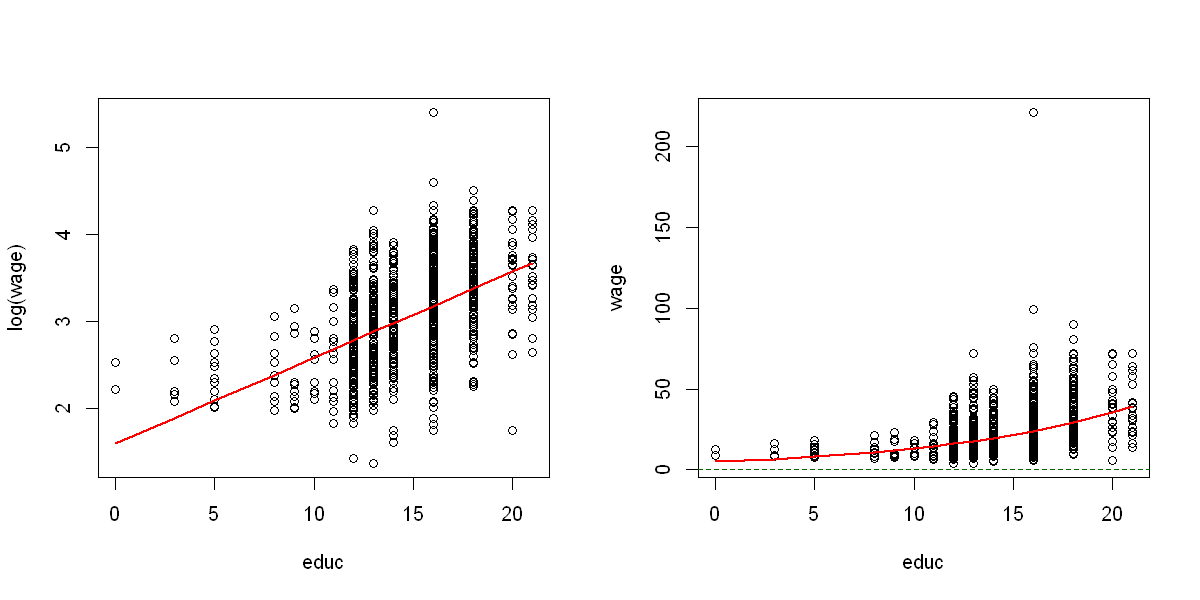

In [44]:
par(mfrow = c(1, 2))
plot(educ, log(wage))
lines(educ[order(educ)], y_loglin_fit[order(educ)], col = "red", lwd = 2)
#
plot(educ, wage)
lines(educ[order(educ)], exp(y_loglin_fit[order(educ)]), col = "red", lwd = 2)
abline(h = 0, col = "darkgreen", lty = 2)

# **Finally**: Use the built-in functions for OLS estimation and compare with your own results.

We will use the `lm()` function in `R` to automatically estimate the coefficients and standard errors for the log-linear model:

In [45]:
lm_fit_loglin <- lm(log(wage) ~ educ)
summary(lm_fit_loglin)$coefficients

Estimate   Std. Error t value  Pr(>|t|)    
(Intercept) 1.59683536 0.07018017 22.75337 1.530466e-95
educ        0.09875341 0.00484219 20.39437 1.344896e-79

# TASK 13
## - Select two models - one model from Task (11) and any other one model from either Task (3) or Task (9) - and test (by calculating the $p$-value) the null hypothesis that the coefficient of your explanatory variable $X$ is not significant, with the alternative that: (a) $\beta_1$ is negative; (b) $\beta_1$ is positive; (c) $\beta_1$ is not zero;

We would like to test the null hypothesis whether education has a significant effect on wage. We will begin by testing the null hypothesis against the alternative, that $\beta_1$ is negative:

$$
\begin{cases}
H_0 &: \beta_1 = 0\\
H_1 &: \beta_1 < 0
\end{cases}
$$

The critical value $t_c = t_{(\alpha, N-2)}$ is:

In [46]:
tc <- qt(0.05, length(educ) - 2)
print(tc)

[1] -1.646127


## Testing for the simple linear model

The $t$-ratio **for the simple linear model** is:

In [47]:
t_stat <- (beta_est_linear[2] - 0) / beta_se_linear[2]
print(t_stat)

    educ 
17.70148 


We reject $H_0$, if $t-\text{ratio} \leq t_{(\alpha, N-2)}$ in our case:

In [48]:
t_stat <= tc

educ 
FALSE

We have no grounds to reject the null hypothesis.

We can calculate the p-value to verify this:

In [49]:
pt(t_stat, df = length(educ) - 2, lower = TRUE)

educ 
   1

p-value is greater than 0.05, so we have no grounds to reject the null hypothesis at the $5\%$ significance level.

Next, we will test the null hypothesis against the alternative, that $\beta_1$ is positive:

$$
\begin{cases}
H_0 &: \beta_1 = 0\\
H_1 &: \beta_1 > 0
\end{cases}
$$

The critical value $t_c = t_{(1 - \alpha, N-2)}$ is:

In [50]:
tc <- qt(1 - 0.05, length(educ) - 2)
print(tc)

[1] 1.646127


The t-ratio is unchanged as it depends on the null hypothesis.

We reject $H_0$, if $t-\text{ratio} \geq t_{(1 - \alpha, N-2)}$ in our case:

In [51]:
t_stat >= tc

educ 
TRUE

We reject the null hypothesis, and conclude that $\beta_1 > 0$.

In [52]:
pt(t_stat, df = length(educ) - 2, lower = FALSE)

educ 
9.102079e-63

since $p$-value < 0.05 we reject the null hypothesis at the $5\%$ significance level.

Finally, we will test the null hypothesis against the alternative, that $\beta_1$ is not zero:

$$
\begin{cases}
H_0 &: \beta_1 = 0\\
H_1 &: \beta_1 \neq 0
\end{cases}
$$

We reject $H_0$, if $t-\text{ratio} \leq t_{(\alpha, N-2)}$ **or** $t-\text{ratio} \geq t_{(1 - \alpha, N-2)}$ in our case:

In [53]:
(t_stat >= tc) | (t_stat <= tc)

educ 
TRUE

So, we reject the null hypothesis at the $5\%$ significance level.

The $p$-value:

In [54]:
2*pt(-abs(t_stat),  df = length(educ) - 2, lower = TRUE)

educ 
1.820416e-62

is less than 0.05, so we reject the null hypothesis.

The last hypothesis test, where we test $H_0$ agains $H_1: \beta_i \neq 0$ is also automatically calculated in the output of `lm()`:

In [55]:
summary(lm_fit_linear)$coefficients

Estimate   Std. Error t value   Pr(>|t|)    
(Intercept) -10.399959 1.9624004  -5.299611 1.380373e-07
educ          2.396761 0.1353989  17.701484 1.820416e-62

The $t$-ratio is in the `t value` column and the $p$-value is in the last column, we see that they are the same as our `t_stat` and the calculated $p$-value of the two-tail hypothesis test.

# TASK 14
## - Plot the confidence intervals for the mean response for each model and plot them for Y (i.e. not log(Y) or any other transformation of Y).

Let $\widehat{Y}_i = \widehat{\beta}_0 + \widehat{\beta}_1 \tilde{X}_i$ for given values $\tilde{X}_i$.
We can also express this in a matrix notation as: $\widehat{\mathbf{Y}} = \widetilde{\mathbf{X}} \widehat{\boldsymbol{\beta}}$

The variance-covariance matrix of the estimated mean response is:
$$
\widehat{\mathbb{V}{\rm ar}} (\widehat{\mathbf{Y}}) = \widetilde{\mathbf{X}} \widehat{\sigma}^2 \left( \mathbf{X}^\top  \mathbf{X}\right)^{-1} \widetilde{\mathbf{X}}^\top = \widetilde{\mathbf{X}}  \widehat{\mathbb{V}{\rm ar}} (\widehat{\boldsymbol{\beta}}) \widetilde{\mathbf{X}}^\top
$$
which means that we need to use the OLS estimator variance-covariance matrix when calculating the confidence intervals for the mean response.

The confidence intervals for the mean response are calculated follows:
$$
\widehat{Y}_i \pm t_{(1 - \alpha/2, N-2)} \cdot \text{se}(\widehat{Y}_i)
$$
where the standard error of the mean response is the square root of the corresponding diagonal elements of the mean response variance-covariance matrix: $\text{se}(\widehat{Y}_i) = \sqrt{\widehat{\mathbb{V}{\rm ar}} (\widehat{Y}_i)}$

We will begin by calculating the standard error of the mean response for the **simple linear model**:

In [56]:
x_tilde <- x_mat
wage_mean_fit    <- x_tilde %*% beta_est_linear
wage_mean_varcov <- x_tilde %*% beta_est_linear_var %*% t(x_tilde)
wage_mean_se <- sqrt(diag(wage_mean_varcov))

Next, we will plot calculate the $95\%$ confidence intervals for the mean response:

In [57]:
wage_mean_lower <- wage_mean_fit - qt(1 - 0.05/2, length(educ) - 2) * wage_mean_se
wage_mean_upper <- wage_mean_fit + qt(1 - 0.05/2, length(educ) - 2) * wage_mean_se

Finally, we will plot the estimated mean resposne along with the lower an upper confidence intervals:

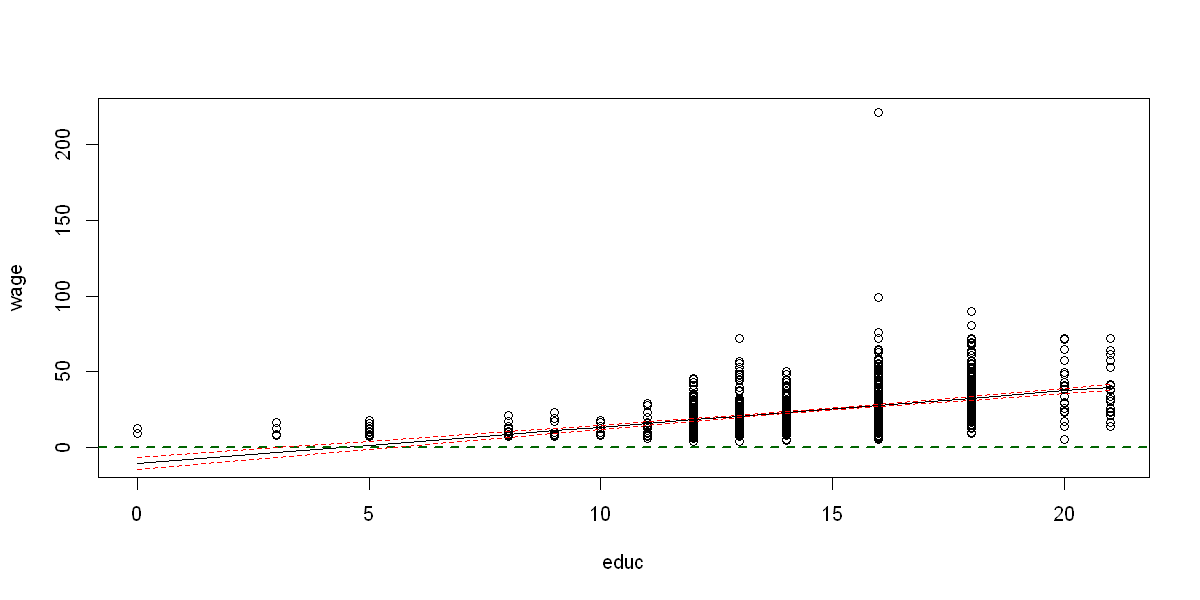

In [58]:
plot(educ, wage, ylim = c(min(wage_mean_fit), max(wage)))
lines(educ[order(educ)], wage_mean_fit[order(educ)])
abline(h = 0, col = "darkgreen", lwd = 2, lty = 2)
lines(educ[order(educ)], wage_mean_lower[order(educ)], lty = 2, col = "red")
lines(educ[order(educ)], wage_mean_upper[order(educ)], lty = 2, col = "red")

Note that we can also do this automatically in `R`:

In [59]:
lm_predict <- predict(lm_fit_linear, newdata = data.frame(educ = educ), interval = c("confidence"), level = 0.95)
head(lm_predict)

fit      lwr      upr     
1 20.75794 19.92651 21.58936
2 23.15470 22.38520 23.92419
3 32.74174 31.47411 34.00937
4 20.75794 19.92651 21.58936
5 20.75794 19.92651 21.58936
6 27.94822 27.04421 28.85223

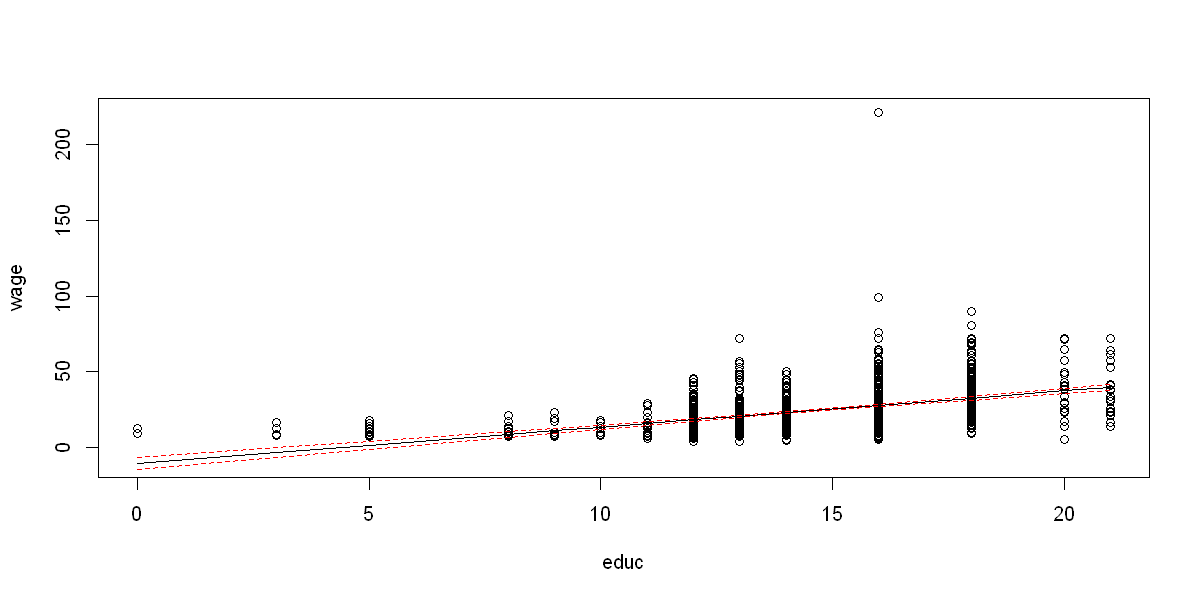

In [60]:
plot(educ, wage, ylim = c(min(wage_mean_fit), max(wage)))
lines(educ[order(educ)], lm_predict[order(educ), "fit"])
lines(educ[order(educ)], lm_predict[order(educ), "lwr"], lty = 2, col = "red")
lines(educ[order(educ)], lm_predict[order(educ), "upr"], lty = 2, col = "red")

### Next, we will calculate the standard error of the mean response for the **log-linear model**:

We will use the built-in functions to do so. First, we will calculate the mean response of $\widehat{\log(\text{wage})}$ along with its confidence interval:

In [61]:
lm_mean_loglin <- predict(lm_fit_loglin, newdata = data.frame(educ = educ),
                          interval = c("confidence"), level = 0.95)
head(lm_mean_loglin)

fit      lwr      upr     
1 2.880630 2.850896 2.910363
2 2.979383 2.951864 3.006902
3 3.374397 3.329063 3.419730
4 2.880630 2.850896 2.910363
5 2.880630 2.850896 2.910363
6 3.176890 3.144560 3.209219

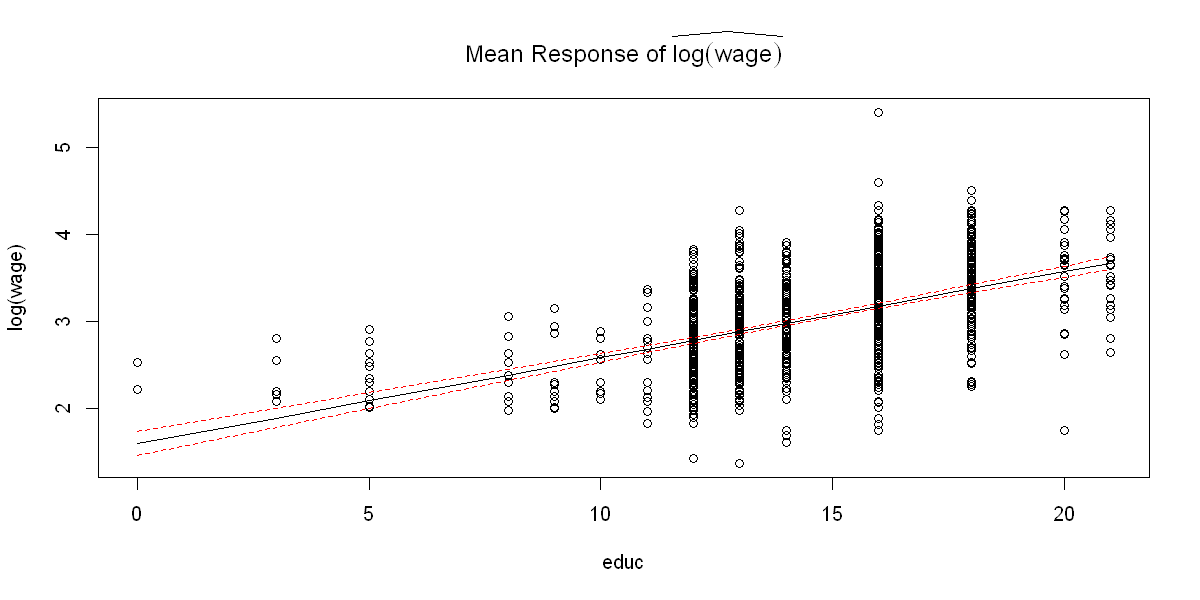

In [62]:
plot(educ, log(wage), main = expression("Mean Response of"~ widehat(log(wage))))
lines(educ[order(educ)], lm_mean_loglin[order(educ), "fit"])
lines(educ[order(educ)], lm_mean_loglin[order(educ), "lwr"], lty = 2, col = "red")
lines(educ[order(educ)], lm_mean_loglin[order(educ), "upr"], lty = 2, col = "red")
abline(h = 0, col = "darkgreen", lty = 2, lwd = 2)

Next, we will take an exponent of the mean response and confidence intervals to get the mean response of `wage`, i.e. $\widehat{\text{wage}} = \widehat{\log(\text{wage})}$:

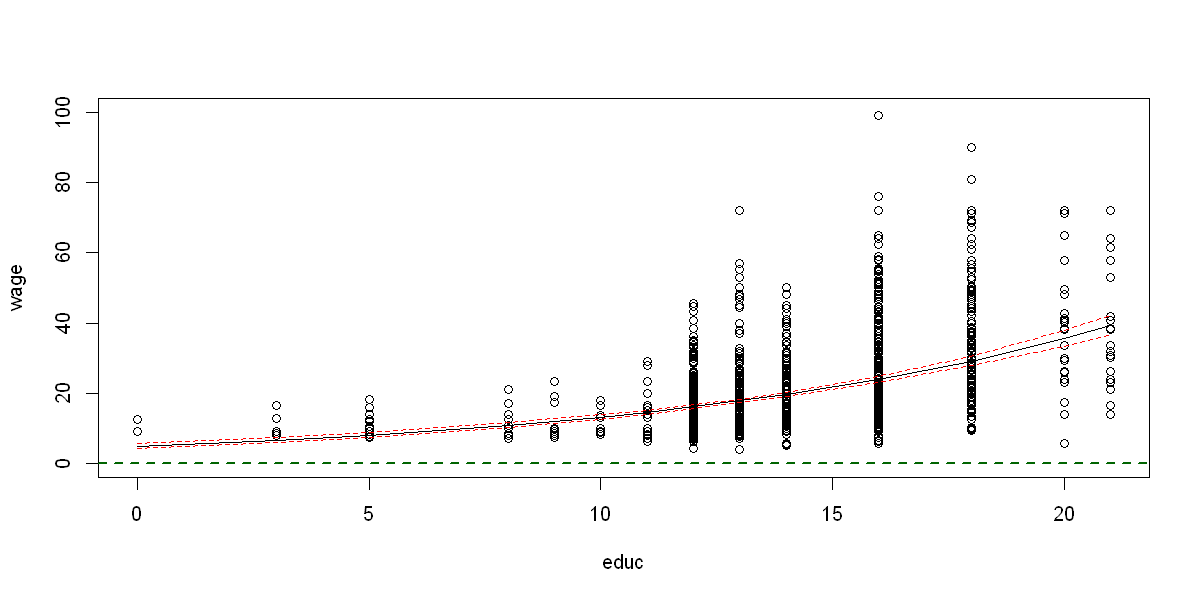

In [63]:
plot(educ, wage, ylim = c(0, 100))
lines(educ[order(educ)], exp(lm_mean_loglin[order(educ), "fit"]))
lines(educ[order(educ)], exp(lm_mean_loglin[order(educ), "lwr"]), lty = 2, col = "red")
lines(educ[order(educ)], exp(lm_mean_loglin[order(educ), "upr"]), lty = 2, col = "red")
abline(h = 0, col = "darkgreen", lty = 2, lwd = 2)

# TASK 15
## - Plot the prediction intervals of Y for existing values of X.

The variance-covariance matrix of the prediction $\widehat{\mathbf{Y}}$ is:
$$
\begin{aligned}
\mathbb{V}{\rm ar}\left( \widetilde{\boldsymbol{e}}  \right) = \widehat{\mathbb{V}{\rm ar}}\left( \widehat{\mathbf{Y}} + \widetilde{\boldsymbol{\varepsilon}}  \right) &= \widehat{\sigma}^2 \left( \mathbf{I} + \widetilde{\mathbf{X}} \left( \mathbf{X}^\top  \mathbf{X}\right)^{-1} \widetilde{\mathbf{X}}^\top\right) \\
&= \widehat{\sigma}^2 \mathbf{I} + \widetilde{\mathbf{X}} \widehat{\sigma}^2\left( \mathbf{X}^\top  \mathbf{X}\right)^{-1} \widetilde{\mathbf{X}}^\top \\
&= \widehat{\sigma}^2 \mathbf{I} + \widehat{\mathbb{V}{\rm ar}} (\widehat{\mathbf{Y}})
\end{aligned}
$$
The prediction intervals for $\widehat{\mathbf{Y}}$ is:
$$
\widehat{Y}_i \pm t_{(1 - \alpha/2, N-2)} \cdot \text{se}(\widetilde{e}_i)
$$
where the standard errors of the forecast are the diagonal elements of the variance-covariance matrix of the prediction: $\text{se}(\widetilde{e}_i) = \sqrt{\widehat{\mathbb{V}{\rm ar}} (\widetilde{e}_i)}$

The prediction variance-covariance matrix is:

In [64]:
wage_pred_varcov <- sigma2_est_linear * diag(nrow(x_tilde)) + wage_mean_varcov
wage_pred_se <- sqrt(diag(wage_pred_varcov))

Then the $95\%$ prediction intervals are:

In [65]:
wage_pred_lower <- wage_mean_fit - qt(1 - 0.05/2, length(educ) - 2) * wage_pred_se
wage_pred_upper <- wage_mean_fit + qt(1 - 0.05/2, length(educ) - 2) * wage_pred_se

Finally, we can plot the prediction intervals. We will plot them alongside the confidence intervals of the mean response:

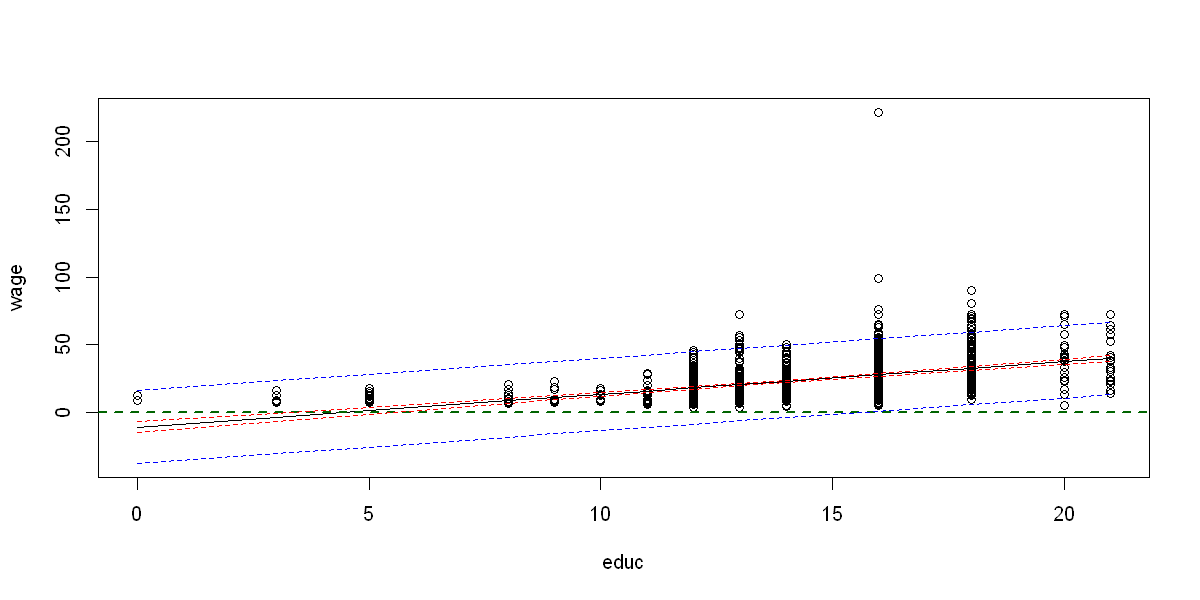

In [66]:
plot(educ, wage, ylim = c(min(wage_pred_lower), max(wage)))
lines(educ[order(educ)], lm_predict[order(educ), "fit"])
abline(h = 0, col = "darkgreen", lwd = 2, lty = 2)
# CI
lines(educ[order(educ)], wage_mean_lower[order(educ)], lty = 2, col = "red")
lines(educ[order(educ)], wage_mean_upper[order(educ)], lty = 2, col = "red")
# PI
lines(educ[order(educ)], wage_pred_lower[order(educ)], col = "blue", lty = 2)
lines(educ[order(educ)], wage_pred_upper[order(educ)], col = "blue", lty = 2)

As you might have guessed - there is also a built-in function inr `R` to calculate the prediction intervals:

In [67]:
lm_predict <- predict(lm_fit_linear, newdata = data.frame(educ = educ), interval = c("predict"), level = 0.95)
head(lm_predict)

fit      lwr       upr     
1 20.75794 -5.845866 47.36174
2 23.15470 -3.447241 49.75664
3 32.74174  6.120737 59.36275
4 20.75794 -5.845866 47.36174
5 20.75794 -5.845866 47.36174
6 27.94822  1.342050 54.55439

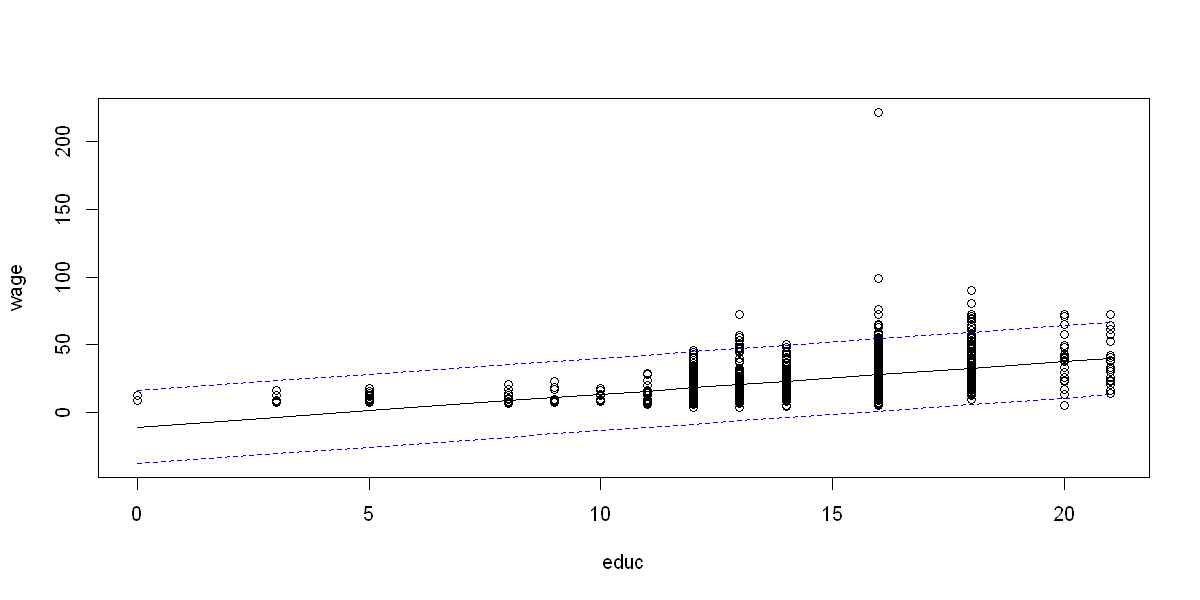

In [68]:
plot(educ, wage, ylim = c(min(lm_predict[order(educ), "lwr"]), max(wage)))
lines(educ[order(educ)], lm_predict[order(educ), "fit"])
lines(educ[order(educ)], lm_predict[order(educ), "lwr"], lty = 2, col = "blue")
lines(educ[order(educ)], lm_predict[order(educ), "upr"], lty = 2, col = "blue")

### Next, we will calculate the standard error of the forecast for the **log-linear model**:

We will use the built-in functions to do so. First, we will calculate $\widehat{\log(\text{wage})}$ along with its prediction interval:

In [69]:
lm_predict_loglin <- predict(lm_fit_loglin, newdata = data.frame(educ = educ), 
                      interval = c("predict"), level = 0.95)
head(lm_predict_loglin)

fit      lwr      upr     
1 2.880630 1.929214 3.832046
2 2.979383 2.028034 3.930733
3 3.374397 2.422365 4.326428
4 2.880630 1.929214 3.832046
5 2.880630 1.929214 3.832046
6 3.176890 2.225389 4.128391

Next, we will take the exponent of the predicted value in the log-linear model, to get the predicted value for `wage`: $\widehat{\text{wage}} = \exp(\widehat{\log(\text{wage})})$. We will do the same for the confidence interval.

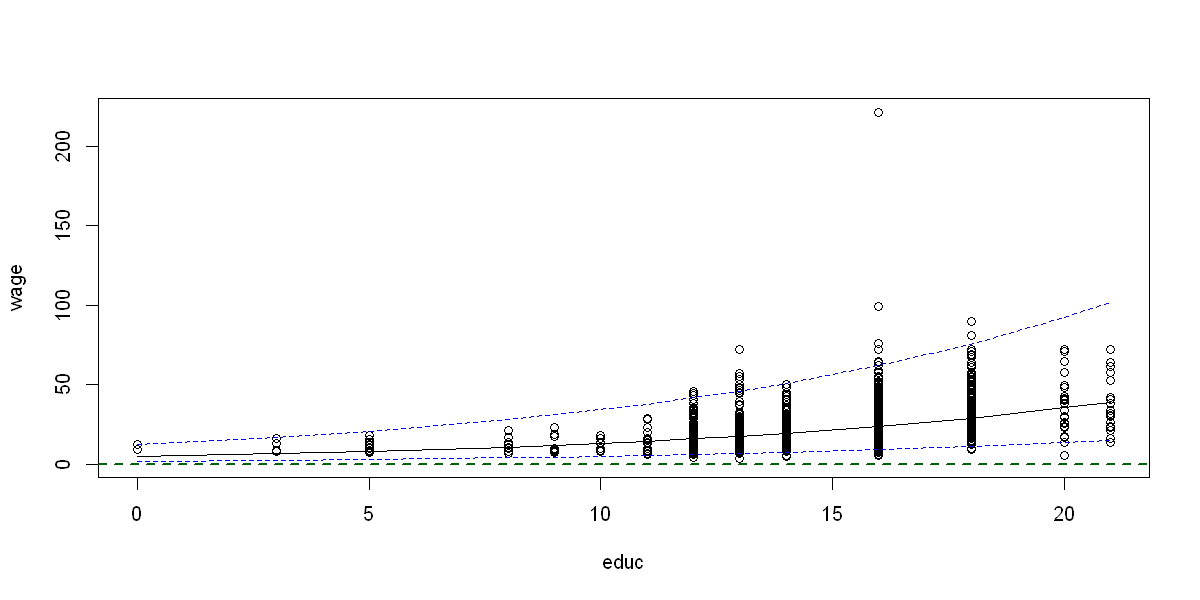

In [70]:
plot(educ, wage, ylim = c(min(lm_predict_loglin[order(educ), "lwr"]), max(wage)))
lines(educ[order(educ)], exp(lm_predict_loglin[order(educ), "fit"]))
lines(educ[order(educ)], exp(lm_predict_loglin[order(educ), "lwr"]), lty = 2, col = "blue")
lines(educ[order(educ)], exp(lm_predict_loglin[order(educ), "upr"]), lty = 2, col = "blue")
abline(h = 0, col = "darkgreen", lty = 2, lwd = 2)

# TASK 16
## Let's say our new $X$ is:
### (a) $\widetilde{X} = 0.8 \cdot \min(X_1, ..., X_N)$
### (b) $\widetilde{X} = 1.1 \cdot \max(X_1, ..., X_N)$
## Calculate the predicted value along with the prediction intervals.

We will begin by calculating the new values of $X$:

In [71]:
new_x_1 <- 0.8 * min(educ)
new_x_2 <- 1.1 * max(educ)
cbind(new_x_1, new_x_2)

new_x_1 new_x_2
[1,] 0       23.1

In this data sample the smallest value of `educ` is zero.

Prediction is pretty straightforward with the built-int `predict()` function:

In [72]:
lin_predict_new_y <- predict(lm_fit_linear,
                             newdata = data.frame(educ = c(new_x_1, new_x_2)),
                             interval = c("predict"), level = 0.95)
loglin_predict_new_y <- predict(lm_fit_loglin,
                                newdata = data.frame(educ = c(new_x_1, new_x_2)),
                                interval = c("predict"), level = 0.95)
quad_predict_new_y <- predict(lm_fit_quad,
                              newdata = data.frame(educ = c(new_x_1, new_x_2)),
                              interval = c("predict"), level = 0.95)

Note that for the log-linear model, we need to take the exponent of the prediciton:

In [73]:
data.frame(linear = lin_predict_new_y[, "fit"], 
           loglin = exp(loglin_predict_new_y)[, "fit"], 
           quadratic = quad_predict_new_y[, "fit"])

linear    loglin    quadratic
1 -10.39996  4.937383  4.916477
2  44.96522 48.329350 52.479276

Furthermore, we can plot these data points along with the true values:

In [74]:
# Set larger plot size:
options(repr.plot.width = 10)
options(repr.plot.height = 15)

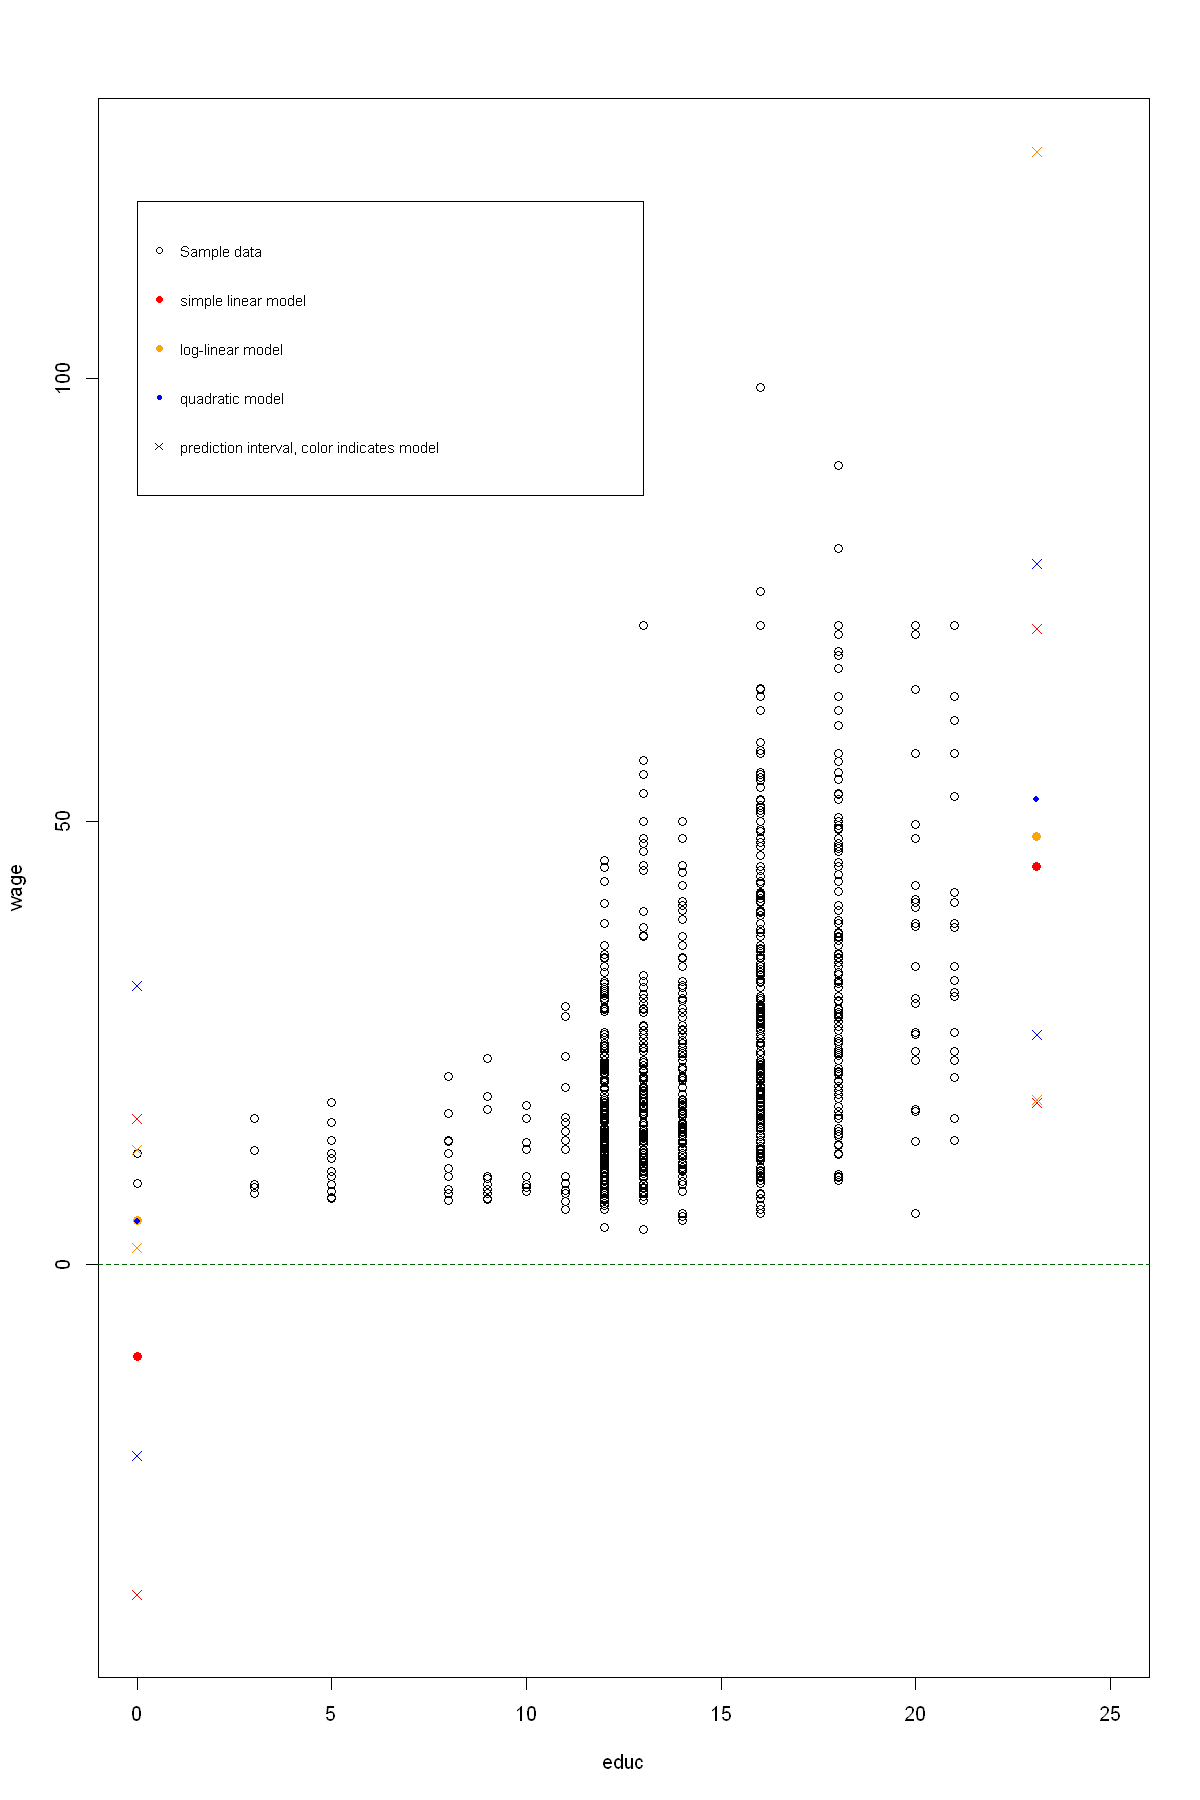

In [75]:
plot(educ, wage, ylim = c(-40, 125), xlim = c(0, 25))
points(c(new_x_1, new_x_2), lin_predict_new_y[, "fit"], col = "red", pch = 19)
points(c(new_x_1, new_x_2), exp(loglin_predict_new_y[, "fit"]), col = "orange", pch = 19)
points(c(new_x_1, new_x_2), quad_predict_new_y[, "fit"], col = "blue", pch = 20)
abline(h = 0, col = "darkgreen", lty = 2)
# Add legend
legend(x = 0, y = 120, cex = 0.75,
      legend = c("Sample data", "simple linear model", "log-linear model", "quadratic model", "prediction interval, color indicates model"),
      pch = c(1, 19, 19, 20, 4), col = c("black", "red", "orange", "blue", "black"))
# Add prediction intervals:
points(c(new_x_1, new_x_2), lin_predict_new_y[, "lwr"], col = "red", pch = 4)
points(c(new_x_1, new_x_2), lin_predict_new_y[, "upr"], col = "red", pch = 4)
#
points(c(new_x_1, new_x_2), exp(loglin_predict_new_y[, "lwr"]), col = "darkorange", pch = 4)
points(c(new_x_1, new_x_2), exp(loglin_predict_new_y[, "upr"]), col = "darkorange", pch = 4)
#
points(c(new_x_1, new_x_2), quad_predict_new_y[, "lwr"], col = "blue", pch = 4)
points(c(new_x_1, new_x_2), quad_predict_new_y[, "upr"], col = "blue", pch = 4)

In [76]:
# Set default plot size
options(repr.plot.width = 10)
options(repr.plot.height = 5)

We see that the log-linear and the quadratic model predicted mean sresponse values are close, when $\widetilde{\text{educ}} = 0.8 \cdot \min(\text{educ}_1, ..., \text{educ}_N) = 0$. When
$\widetilde{\text{educ}} = 1.1 \cdot \max(\text{educ}_1, ..., \text{educ}_N)$, we see that the quadratic model has the largest predicted value.

From the prediction intervals we see that the prediction intervals for the quadratic model contain negative values (not realistic for wage), but for larger values, they are lower than the predicition intervals of the log-linear model.

While the **negative confidence interval** is not quite realistic (for the quadratic model we could always manually cap the interval at zero, since $\text{educ} \geq 0$ and $\widehat{\beta}_0  = 4.91647 > 0$), for the quadratic model the smaller confidence interval for the larger `educ` value may be more plausible - from our data sample it appears that for $\text{educ} > 20$ the variance in `wage` is smaller, compared to the variance, when `educ` is between 15 and 20.

# TASK 17
## - Calculate (either manually or using the built-in OLS estimation functions) $R^2$ of your selected models from Task (13).
## - Can you directly compare the $R^2$ values of your selected models (and why)?

We will begin by manually calculating $R^2$ for the simple linear model.

We will need to calculate the following:
$$
\text{RSS} = \sum_{i = 1}^N \widehat{\epsilon}_i^2
$$
and
$$
\text{TSS} = \sum_{i = 1}^N (Y_i - \overline{Y})^2
$$

In [77]:
RSS <- sum(lm_fit_linear$residuals^2)
TSS <- sum((wage - mean(wage))^2)

This will allow us to calculate $R^2$ as:
$$
R^2 = 1 - \dfrac{\text{RSS}}{\text{TSS}}
$$

In [78]:
R_sq <- 1 - RSS / TSS
print(R_sq)

[1] 0.2073273


This value means that our simple linear regression explains roughly $20.7\%$ of the variation in `wage`. 

Since we have a univariate regression with one variable, we could say that $20.7\%$ of the variation in `wage` is explained by education (while the rest is explained by the unobservable random shocks $\epsilon$).

This can also be done automatically from the `lm()` results:

In [79]:
print(summary(lm_fit_linear)$r.squared)

[1] 0.2073273


For the *quadratic* model:

In [80]:
print(summary(lm_fit_quad)$r.squared)

[1] 0.2193561


We have that $21.94\%$ of the variation in wage is explained by our quadratic model.

For the *log-linear* model:

In [81]:
print(summary(lm_fit_loglin)$r.squared)

[1] 0.2577126


We have that $25.77\%$ of the variation in $\log(\text{wage})$ is explained by our regression model.

We can directly compare $R^2$ of the simple linear and quadratic models - our quadratic model is slightly better, as it explains around $1\%$ more variation than the linear model.

The $R^2$ in the log-linear model is not comparable to the $R^2$ in the simple linear and quadratic models, since the dependent variable is transformed (and it this case, its scale is logarithmic). 

If it were simply scaled by some constant - our $R^2$ would be unchanged and could be comparable (see the theory notes).

# TASK 18
## - Calculate $R^2_g$ (the general $R^2$) for the back-transformed variables (i.e. for non-transformed values of the dependent variable - $Y$).
## - Is it larger than the standard $R^2$, which is reported by either `lm()` in `R`, or `sm.OLS()` in `Python`?

From the lecture notes, $R^2_g$ can be calculated as:
$$
R^2_g = \mathbb{C}{\rm orr}(Y, \widehat{Y})^2
$$

In [82]:
cor(wage, lm_fit_linear$fitted.values)^2

[1] 0.2073273

In [83]:
cor(wage, exp(lm_fit_loglin$fitted.values))^2

[1] 0.2159494

In [84]:
cor(wage, lm_fit_quad$fitted.values)^2

[1] 0.2193561

$R^2_g$ is the same for the simple linear model. It is also the same for the quadratic model. It is different (and slightly lower) for the log-linear model.

The **general $R^2$** (i.e. $R^2_g$) is the largest for the quadratic model, though not by much. On the other hand, the difference in $R^2_g$ between between the log-linear and quadratic models is less than from the simple linear model.

# TASK 19
## - Which model has the largest $R^2$ (is it the same model if we compare with $R^2_g$) ? 
## - Is the model the same as in Task (11)? 
## - For the model with the largest $R^2$, provide an interpretation of the calculated $R^2$ value.

The largest $R^2$ is for the log-linear model, but as mentioned before, it is not comparable to the linear and quadratic models, because the dependent variables do not have the same transformations. In this case, the logarithmic scale partially contributes to an increase in $R^2$. From the calculated $R^2_g$ we see that the log-linear model is indeed better than the simple linear, but less so than the quadratic model.

Overall $R^2$ did not help us identify any model, which would be marginally better than the rest. This is a great example of why we should only look at $R^2$ as a reference, and pay closer attention to coefficient significance, signs as well as the prediction values and prediction intervals to make sure they make economic sense.

(NOTE: we have already provided interpretations of $R^2$ in TASK 17).

# TASK 20
## Once again look at the residuals plots:
## - scatter plot of residuals and fitted values, scatter plot of the residuals and - are there any non-linearities in the residuals?
## - residual Q-Q plot, their histogram - are the residuals normal?

We will begin by examining the **residual vs fitted** scatterplot:

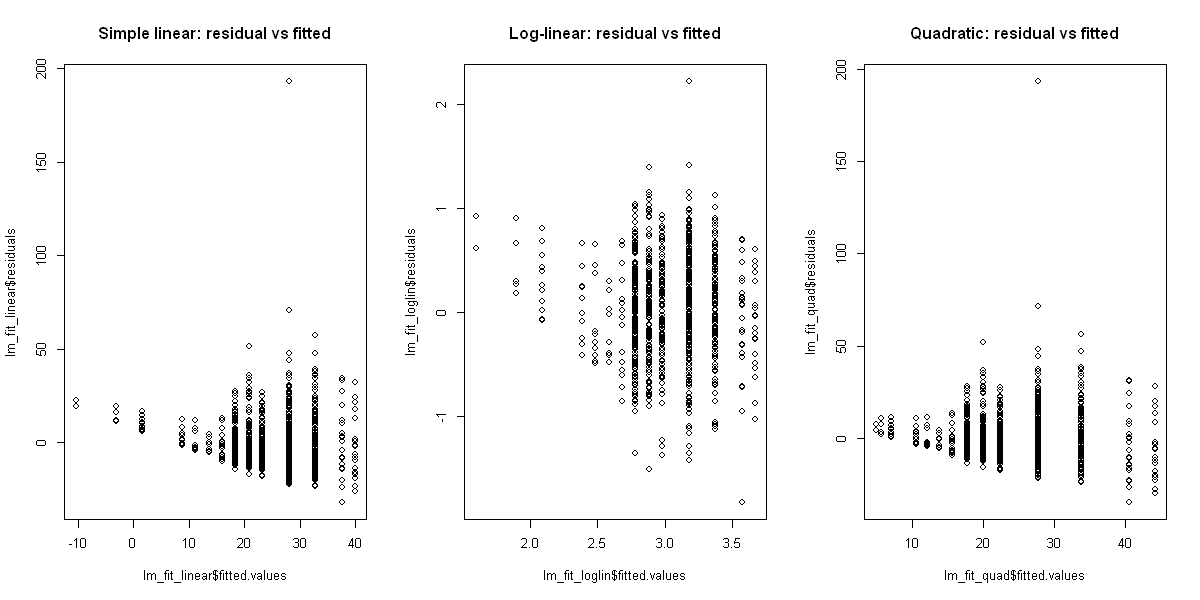

In [85]:
par(mfrow = c(1, 3))
#Linear Model
plot(lm_fit_linear$fitted.values, lm_fit_linear$residuals, main = "Simple linear: residual vs fitted")
#Log-linear
plot(lm_fit_loglin$fitted.values, lm_fit_loglin$residuals, main = "Log-linear: residual vs fitted")
#Quadratic Model
plot(lm_fit_quad$fitted.values, lm_fit_quad$residuals, main = "Quadratic: residual vs fitted")

We see that of the three plots the log-linear model residuals appear to have residuals without any non-linear relationships. Since we have fewer observations for lower values of `wage`, it may appear that the variance is not constant. On the other hand, it may be possible that for lower `wage` values the residuals has a smaller variance, than for higher `wage` values.

If we check the **residual vs independent variable** scatter plot:

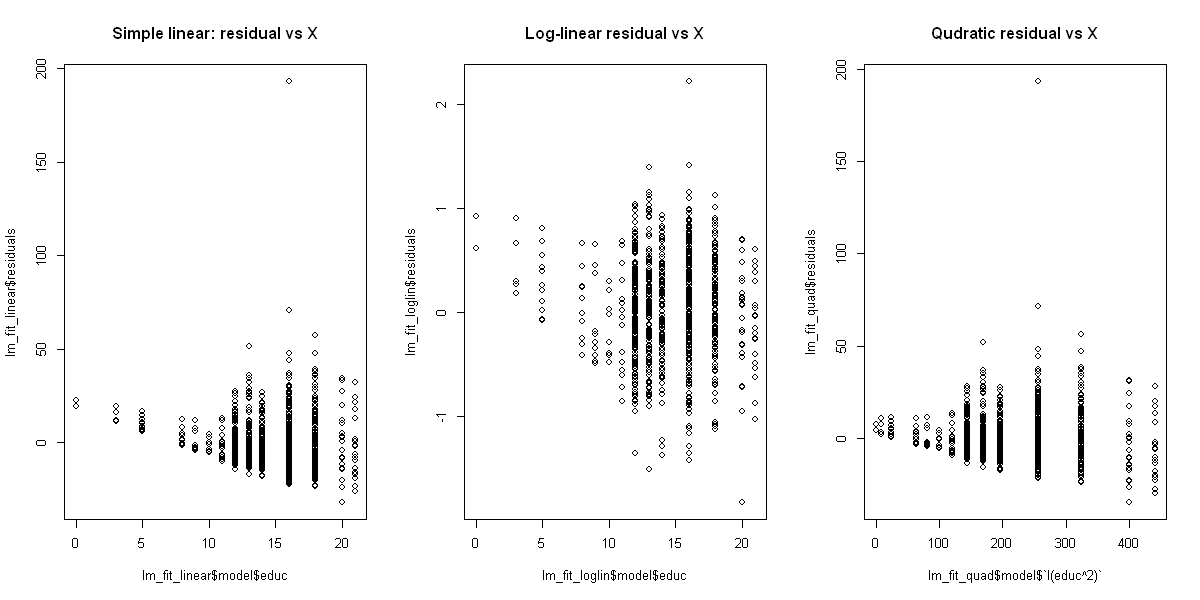

In [86]:
par(mfrow = c(1, 3))
#Linear Model
plot(lm_fit_linear$model$educ, lm_fit_linear$residuals, main = "Simple linear: residual vs X")
#Log-linear
plot(lm_fit_loglin$model$educ, lm_fit_loglin$residuals, main = "Log-linear residual vs X")
#Quadratic Model
plot(lm_fit_quad$model$`I(educ^2)`, lm_fit_quad$residuals, main = "Qudratic residual vs X")

we arrive at the same conclusions as we did for the residual vs fitted scatter plots.

Next, we will examine the residual Q-Q plot and histogram (we will also plto a boxplot for comparison):

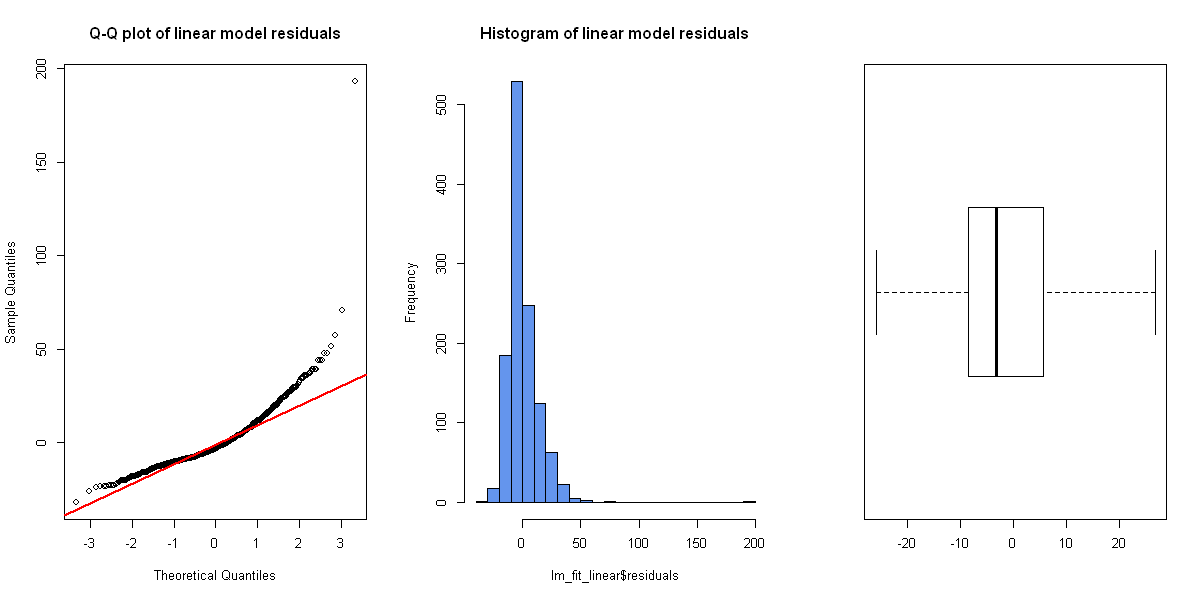

In [87]:
par(mfrow = c(1, 3))
qqnorm(lm_fit_linear$residuals, main = "Q-Q plot of linear model residuals")
qqline(lm_fit_linear$residuals, col = "red", lwd = 2)
hist(lm_fit_linear$residuals, col = "cornflowerblue", breaks = 25, main = "Histogram of linear model residuals")
boxplot(lm_fit_linear$residuals, horizontal = TRUE, outline = FALSE)

It appears that the residuals are skewed and from a non-normal distribution - the residuals on the Q-Q plot do not fall along a straight line with the theoretical quantiles of a normal distribution. Furthermore, the histogram indicates that the residual distribution is skewed to the right hand side of the histogram (we can also see that the median is closer to the first quartile than the third quartile).

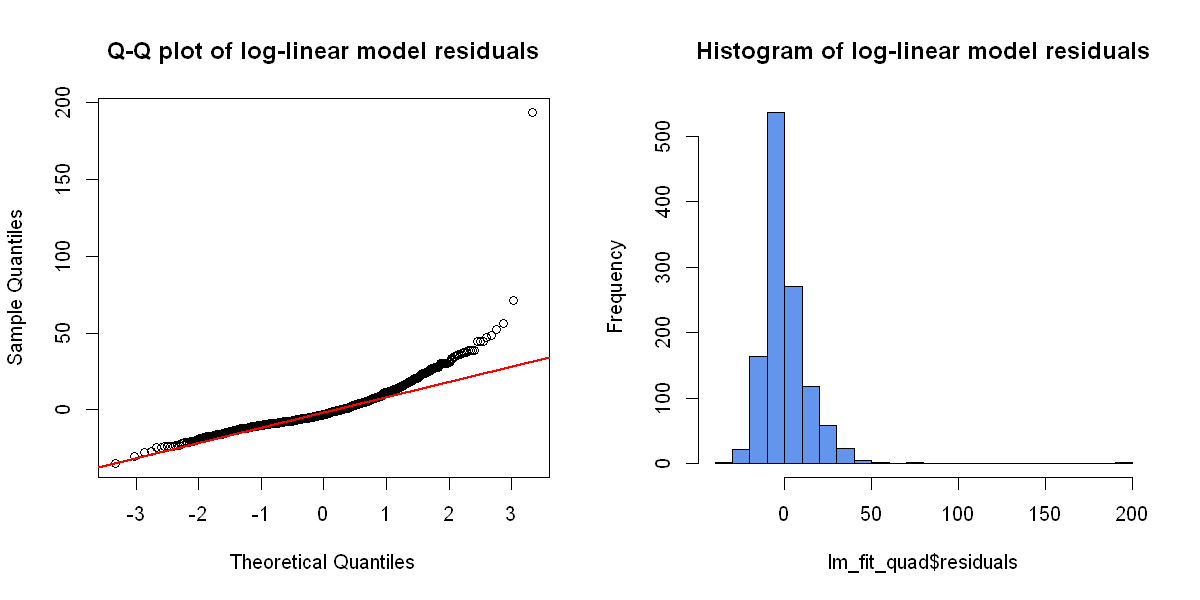

In [88]:
par(mfrow = c(1, 2))
qqnorm(lm_fit_quad$residuals, main = "Q-Q plot of log-linear model residuals")
qqline(lm_fit_quad$residuals, col = "red", lwd = 2)
hist(lm_fit_quad$residuals, col = "cornflowerblue", breaks = 25, main = "Histogram of log-linear model residuals")

The residuals of a log-linear model apear to closely resembel a normal distribution - the histogram resembles a bell shape that is fammiliar of a normal distribution, while the Q-Q plot falls along a straight line.

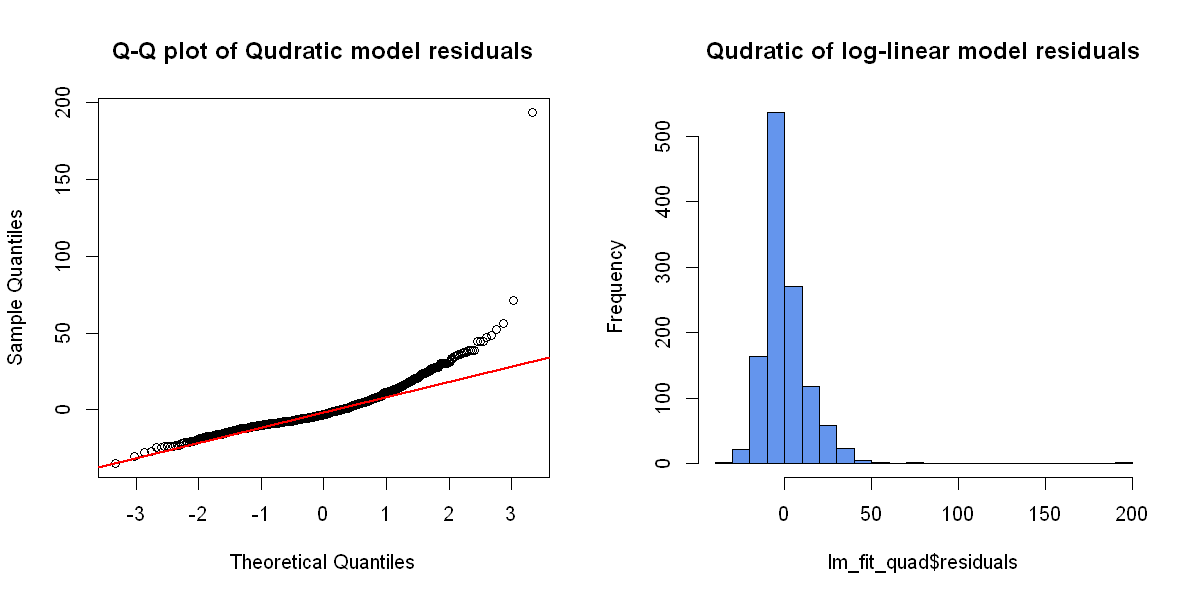

In [89]:
par(mfrow = c(1, 2))
qqnorm(lm_fit_quad$residuals, main = "Q-Q plot of Qudratic model residuals")
qqline(lm_fit_quad$residuals, col = "red", lwd = 2)
hist(lm_fit_quad$residuals, col = "cornflowerblue", breaks = 25, main = "Qudratic of log-linear model residuals")

Unfortunately, the residuals of a quadratic model do not appear to be from a normal distribution - they are quite similar to the residuals from a simple linear model.

In this case, we see that, while the quadratic model appears to be similar to a log-linear model in terms of predicted values and $R^2$, its residuals do not follow the normality assumption which we require in order to test hypothesis on coefficient significance and distribution.

# TASK 21
## Carry out:
###    - Breusch-Pagan Test for homoskedasticity;
###    - Durbin-Watson Test for autocorrelation;
###    - Shapiro-Wilk Test for normality. 
## What are the null and alternative hypothesis of these tests? What do these test results say about the residuals?

We will begin by testing the following hypothesis:
$$
\begin{aligned}
H_0&: \text{ (residuals are homoskedastic)}\\
H_1&: \text{ (residuals are heteroskedastic)}
\end{aligned}
$$
via the Breusch-Pagan test:

In [90]:
print(lmtest::bptest(lm_fit_linear))


	studentized Breusch-Pagan test

data:  lm_fit_linear
BP = 7.4587, df = 1, p-value = 0.006313



since $p$-value = 0.0063 < 0.05, so we reject the null hypothesis and accept the alternative that the simple linear regression residuals are heteroskedastic.

In [91]:
print(lmtest::bptest(lm_fit_loglin))


	studentized Breusch-Pagan test

data:  lm_fit_loglin
BP = 6.9769, df = 1, p-value = 0.008257



since $p$-value = 0.0068257 < 0.05, so we reject the null hypothesis and accept the alternative that the log linear regression residuals are heteroskedastic.

In [92]:
print(lmtest::bptest(lm_fit_quad))


	studentized Breusch-Pagan test

data:  lm_fit_quad
BP = 9.7331, df = 1, p-value = 0.00181



since $p$-value < 0.05, so we reject the null hypothesis and accept the alternative that the quadratic regression residuals are heteroskedastic.

Next, we will test the hypothesis:
$$
\begin{aligned}
H_0&:\text{the residuals are serially uncorrelated}\\
H_1&:\text{the residuals follow a first order autoregressive process (i.e. autocorrelation at lag 1)}
\end{aligned}
$$
via Durbin-Watson test:

In [93]:
print(lmtest::dwtest(lm_fit_linear, alternative = "two.sided"))
print(lmtest::dwtest(lm_fit_loglin, alternative = "two.sided"))
print(lmtest::dwtest(lm_fit_quad, alternative = "two.sided"))


	Durbin-Watson test

data:  lm_fit_linear
DW = 1.9595, p-value = 0.4828
alternative hypothesis: true autocorrelation is not 0


	Durbin-Watson test

data:  lm_fit_loglin
DW = 1.9703, p-value = 0.6064
alternative hypothesis: true autocorrelation is not 0


	Durbin-Watson test

data:  lm_fit_quad
DW = 1.9587, p-value = 0.4742
alternative hypothesis: true autocorrelation is not 0



since $p$-value > 0.05, we have no grounds to reject the null hypothesis that the residuals are not serially correlated in any of the three - linear, log-linear or quadracic - models.

Finally, we will test the normality hypothesis:
$$
\begin{aligned}
H_0&:\text{residuals follow a normal distribution}\\
H_1&:\text{residuals do not follow a normal distribution}
\end{aligned}
$$
via Shapiro-Wilk test:

In [94]:
print(shapiro.test(lm_fit_linear$residuals))
print(shapiro.test(lm_fit_loglin$residuals))
print(shapiro.test(lm_fit_quad$residuals))


	Shapiro-Wilk normality test

data:  lm_fit_linear$residuals
W = 0.82704, p-value < 2.2e-16


	Shapiro-Wilk normality test

data:  lm_fit_loglin$residuals
W = 0.99546, p-value = 0.001196


	Shapiro-Wilk normality test

data:  lm_fit_quad$residuals
W = 0.82939, p-value < 2.2e-16



In all three models, we reject the null hypothesis and conclude that the residuals are not normally distributed. 

On the other hand, if we look at alternative normality tests for the log-linear model residuals (since their histogram and Q-Q plot most closely resembled the normal distribution case), for example the Jarque-Bera test:

In [95]:
print(tseries::jarque.bera.test(lm_fit_linear$residuals))
print(tseries::jarque.bera.test(lm_fit_loglin$residuals))
print(tseries::jarque.bera.test(lm_fit_quad$residuals))


	Jarque Bera Test

data:  lm_fit_linear$residuals
X-squared = 63871, df = 2, p-value < 2.2e-16


	Jarque Bera Test

data:  lm_fit_loglin$residuals
X-squared = 1.5331, df = 2, p-value = 0.4646


	Jarque Bera Test

data:  lm_fit_quad$residuals
X-squared = 68599, df = 2, p-value < 2.2e-16



For the log-linear model: since $p$-value > 0.05, we have no grounds to reject the null hypothesis of normality for the log-linear model residuals. 

For the remaining models: we reject the null hypothesis for the simple linear and the quadratic model since $p$-value < 0.05 for those models' residuals. 

As such, it is a good idea to not rely solely on a single test for residual normality (or other residual tests discussed in this task).

# TASK 22
## - Looking at all of the results thus far - which model would you consider the “best” and why?

From **Task 21** we have that:

- none of the model residuals are autocorrelated;
- **all of the model residuals are heteroskedastic**;
- according to the Durbin-Watson test, none of the residuals are normally distributed;
- **the Jarque-Bera test suggests that the log-linear model resiguals may be normally distributed**;

From** Task 20** we have that: 

- residual scatter plot (vs fitted and vs `educ`) indicate that the log-linear model residuals exhibit the least amount of a non-linear dependence than the other model residuals.
- the log-linear model residuals look normally distributed;

From **Task 18**: according to $R^2_g$, log-linear and quadratic models are similar in terms of percentage of variation in `wage` explained by the specifried model and are better than the simple linear model.

From **Task 9, 15 $\&$ 16**: The log-linear and qudratic models provide fitted values which coincide with economic theory. The simple linear regression predicts negative values of `wage` of small values of `educ` - this is not possible for hourly wage and as such the linear model is not a good fit for our data.

We also note that the $\beta_1$ coefficients have the expected (from economic theory) positive signs and are statistically significant.

**From all of this**, we can conclude that the log-linear model may be the best fit of the three models,  because the residuals are also additionally normally distributed (which is what we want from our model).

However, **none** of the model residuals are homoskedastic. Part of this could be explained by the fact that we do not have enough observations for smaller values of `educ` (and for smaller values of `wage`), so the variation may be different for lower values of `wage` (for up to 10 years of `educ`), compared to larger values of `wage` (when `educ` is 10+ years).

Because the residuals are not homoskedastic, the estimated OLS coefficients are not efficient (so they are not BLUE), and the standard errors are biased (so we may not make the correct assumptions about significance). To account for this, we would need to either: correct the residuals, use a different estimation method (weighted least squares), or attempt to account for the heteroskedasticity by including some additional variables alongside `educ` or try some other transformation of the varibales (maybe a cubic model?).

# TASK 23
### - Take a subset of the data - around $80\%$ of the sample and estimate the best model, which you selected in TASK (21), on the subset.
### - Are the model results (signs, significance, residual GoF tests) similar to the model on the full data?
### - Plot the subset data along with the predicted values of the model;
### - Calculate the predicted values and confidence intervals for the remaining $20\%$;
### - Plot the predicted values, their confidence intervals and the actual values - do the true values fall in the confidence intervals?

We will begin by taking a subset of the data. To do this, firstly, get the index of the data $i = 1,...,N$:

In [96]:
dt_index <- 1:length(educ)
head(dt_index)

[1] 1 2 3 4 5 6

The $80\%$ of the data is equal to:

In [97]:
floor(0.8 * nrow(dt4))

[1] 960

here, we use `floor()` to take the integer value, in case we get a value with a fraction.

We want to take a sample of the data. This is equivalent to takinng a ubset of the index vector, which we can use to select the data sample:

In [98]:
set.seed(123)
#
smpl_index <- sample(dt_index, size = floor(0.8 * nrow(dt4)), replace = FALSE)
head(smpl_index)

[1]  346  946  490 1057 1125   55

Note that we are taking the index values **without replacement** - each element from the index can be aken only once.

In comparison, the remaining index values, which we do not take, can be selected by using `setdiff()` function, which returns the values in `dt_index`, which are not in `smpl_index`:

In [99]:
head(setdiff(dt_index, smpl_index))

[1]  3 10 14 28 34 37

We will call the dataset used for modelling - the **training set**. The remaining data will be called the **test set**.

In [100]:
dt4_train <- dt4[smpl_index, ]
dt4_test  <- dt4[setdiff(dt_index, smpl_index), ]

For comparison, the data looks like:

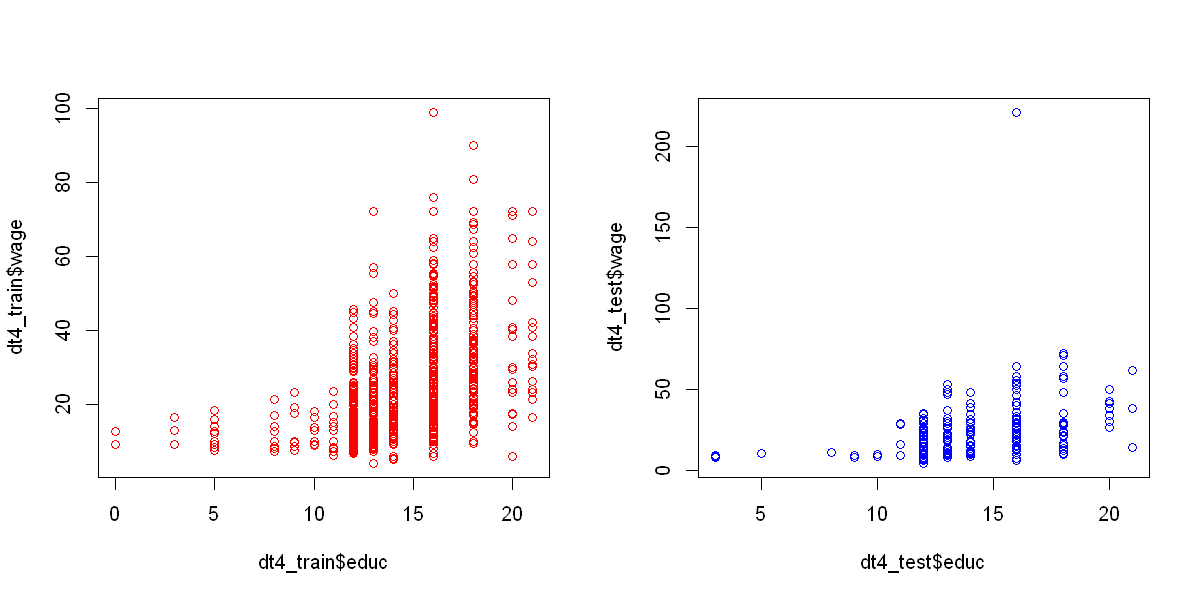

In [101]:
par(mfrow = c(1, 2))
plot(dt4_train$educ, dt4_train$wage, col = "red")
plot(dt4_test$educ, dt4_test$wage, col = "blue")

As we have mentioned in Task 21, we chose a log-linear as the best univariate regression model of the models that we used for this dataset.

In [102]:
dt4_smpl_mdl <- lm(log(wage) ~ 1 + educ, data = dt4_train)
summary(dt4_smpl_mdl)$coefficients

Estimate   Std. Error  t value  Pr(>|t|)    
(Intercept) 1.59648568 0.077095422 20.70792 5.149736e-79
educ        0.09906724 0.005309972 18.65683 1.667404e-66

The coefficients are similar compared to the coefficients of the model on the full dataset:

In [103]:
summary(lm_fit_loglin)$coefficients

Estimate   Std. Error t value  Pr(>|t|)    
(Intercept) 1.59683536 0.07018017 22.75337 1.530466e-95
educ        0.09875341 0.00484219 20.39437 1.344896e-79

The tests can be carried out as before:

In [104]:
# Test for homoskedasticity
print(lmtest::bptest(dt4_smpl_mdl))


	studentized Breusch-Pagan test

data:  dt4_smpl_mdl
BP = 3.9245, df = 1, p-value = 0.04759



If we do not reject the null hypothesis that the residuals are homoskedastic, this would indicate that our model on the training set has homoskedastic errors (i.e. with a constant variance) - something that we did not have previously. 

In this case the $p$-value is very close to 0.05, so this may be further evidence that we did not have enough observations on smaller values of `wage`.

In [105]:
# Test for autocorrelation:
print(lmtest::dwtest(dt4_smpl_mdl, alternative = "two.sided"))


	Durbin-Watson test

data:  dt4_smpl_mdl
DW = 2.0742, p-value = 0.2499
alternative hypothesis: true autocorrelation is not 0



Since $p$-value > 0.05, we do not reject the null hypothesis of no serial correlation.

In [106]:
print(shapiro.test(dt4_smpl_mdl$residuals))
print(tseries::jarque.bera.test(dt4_smpl_mdl$residuals))


	Shapiro-Wilk normality test

data:  dt4_smpl_mdl$residuals
W = 0.99542, p-value = 0.005716


	Jarque Bera Test

data:  dt4_smpl_mdl$residuals
X-squared = 0.7895, df = 2, p-value = 0.6738



For normality test - we still reject the null hypothesis of normally distributed residuals via the Shapiro-Wilk test, and do not reject the null hypothesis via Jarque-Bera Test.

Overall, **the only difference is in the homoskedasticity test** - the residuals may be homoskedastic, since the $p$-value is quite close to the $5\%$ critical level.

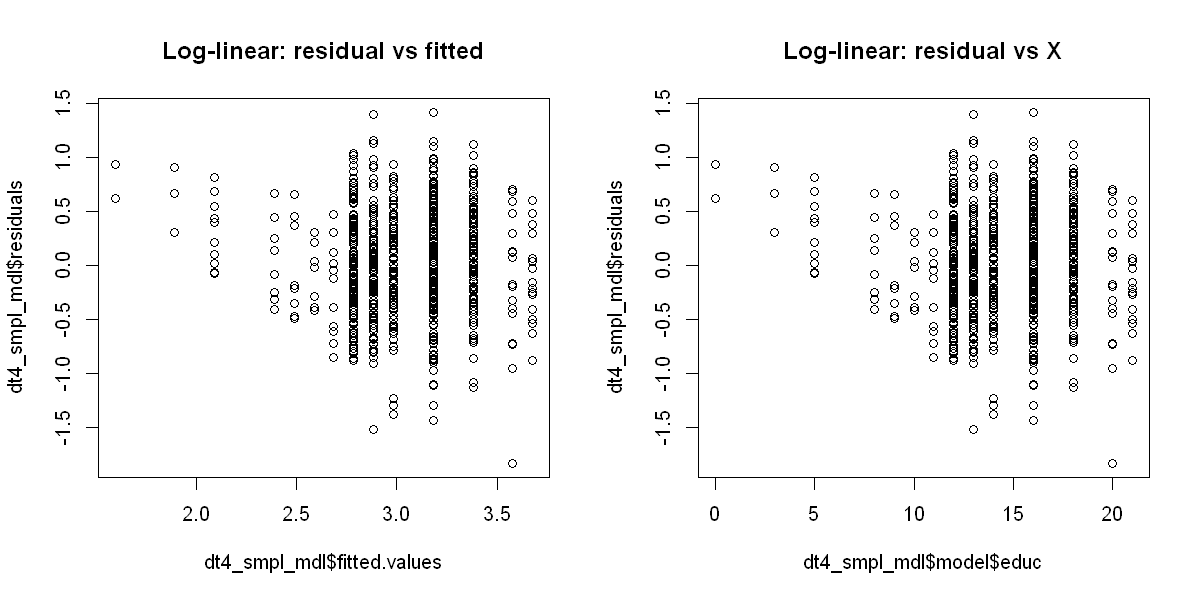

In [107]:
par(mfrow = c(1, 2))
plot(dt4_smpl_mdl$fitted.values, dt4_smpl_mdl$residuals, main = "Log-linear: residual vs fitted")
plot(dt4_smpl_mdl$model$educ, dt4_smpl_mdl$residuals, main = "Log-linear: residual vs X")

Visually though, there is not a huge difference from before.

Consequently, the fitted values alongside the training dataset are similar to as before:

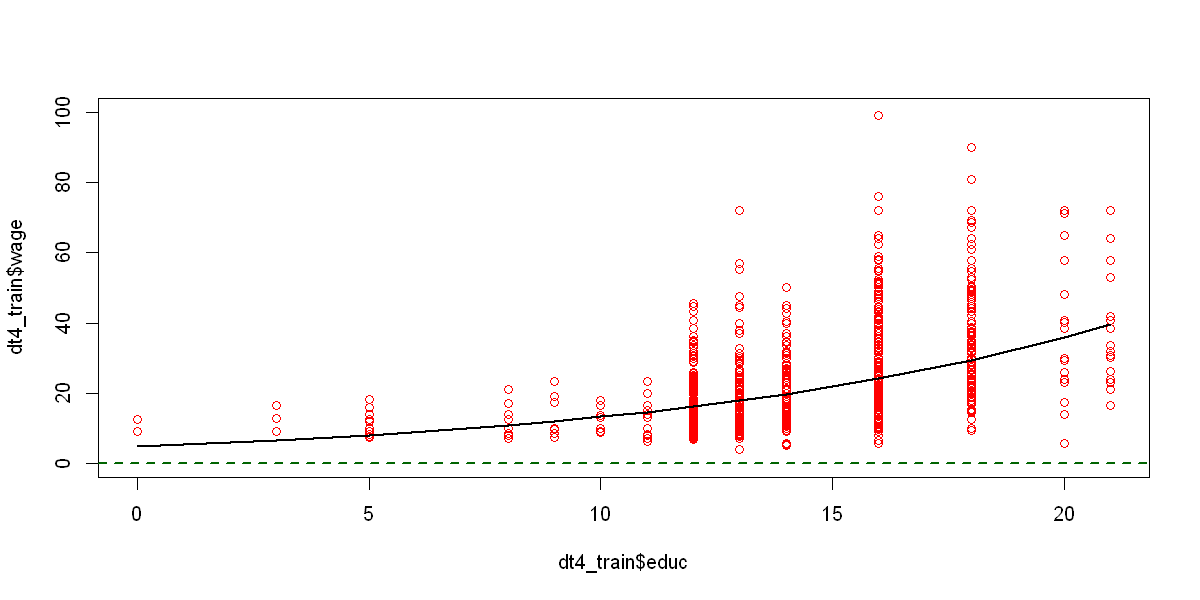

In [108]:
plot(dt4_train$educ, dt4_train$wage, col = "red", ylim = c(0, 100))
lines(dt4_train$educ[order(dt4_train$educ)], exp(dt4_smpl_mdl$fitted.values[order(dt4_train$educ)]), lwd = 2)
abline(h = 0, col = "darkgreen", lty = 2, lwd = 2)

Next, we can calculate the predicted values for the test set:

In [109]:
test_set_predict <- predict(dt4_smpl_mdl, 
                             newdata = data.frame(educ = dt4_test$educ), 
                             interval = c("predict"), level = 0.95)

Here is a sample of the predicted values:

In [110]:
head(test_set_predict)

fit      lwr      upr     
1 3.379696 2.441467 4.317925
2 2.983427 2.046019 3.920835
3 2.785293 1.847601 3.722984
4 2.785293 1.847601 3.722984
5 3.379696 2.441467 4.317925
6 2.983427 2.046019 3.920835

Next, we will plot the test data as well as the predicted values and confidence intervals:

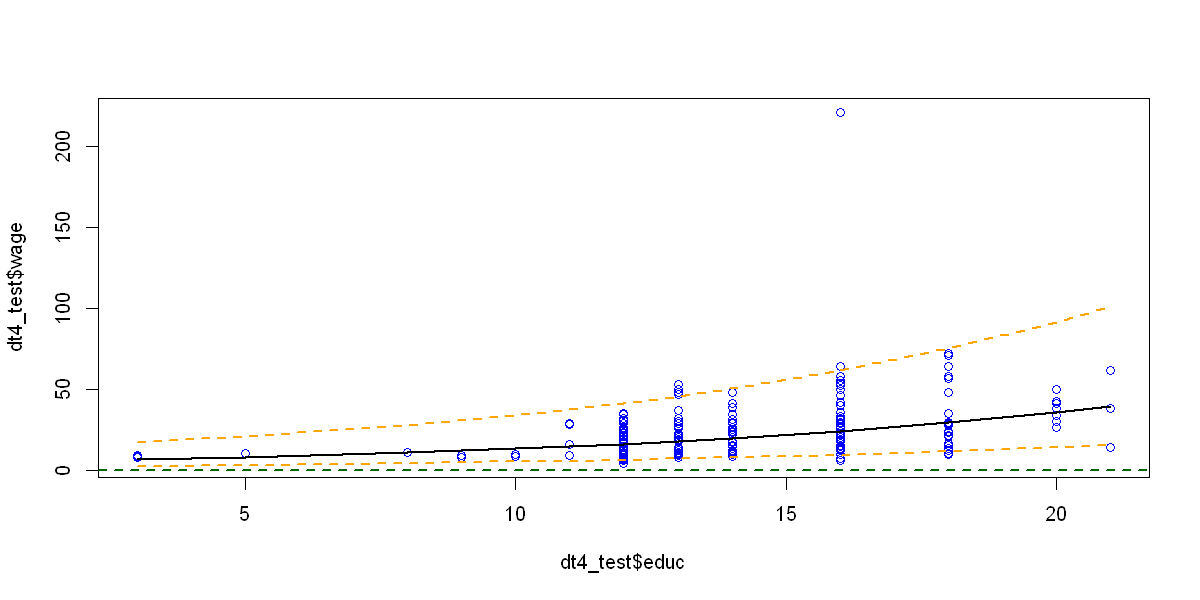

In [111]:
plot(dt4_test$educ, dt4_test$wage, col = "blue")
lines(dt4_test$educ[order(dt4_test$educ)], exp(test_set_predict[order(dt4_test$educ), "fit"]), lwd = 2)
lines(dt4_test$educ[order(dt4_test$educ)], exp(test_set_predict[order(dt4_test$educ), "lwr"]), lwd = 2, lty = 2, col = "orange")
lines(dt4_test$educ[order(dt4_test$educ)], exp(test_set_predict[order(dt4_test$educ), "upr"]), lwd = 2, lty = 2, col = "orange")
abline(h = 0, col = "darkgreen", lty = 2, lwd = 2)

We see that not all of the values are in the prediction intervals. we can calculate which values fall in the interval (note, remember, that we  are predicting the logarithms of wage in our log-linear model, so we need to take the exponent):

In [112]:
tmp_dt <- data.frame(exp(test_set_predict), actual = dt4_test$wage)
head(tmp_dt)

fit      lwr       upr      actual
1 29.36184 11.489879 75.03280 15.38 
2 19.75540  7.737040 50.44254 34.57 
3 16.20456  6.344579 41.38773 24.35 
4 16.20456  6.344579 41.38773 16.33 
5 29.36184 11.489879 75.03280 12.50 
6 19.75540  7.737040 50.44254 28.95

Next, we will check which rows are **greater** than the lower bound, `lwr`, and **less** than the upper bound, `upr`:

In [113]:
tmp_dt$in_interval <- (tmp_dt$actual >= tmp_dt$lwr) & (tmp_dt$actual <= tmp_dt$upr)

In [114]:
head(tmp_dt)

fit      lwr       upr      actual in_interval
1 29.36184 11.489879 75.03280 15.38  TRUE       
2 19.75540  7.737040 50.44254 34.57  TRUE       
3 16.20456  6.344579 41.38773 24.35  TRUE       
4 16.20456  6.344579 41.38773 16.33  TRUE       
5 29.36184 11.489879 75.03280 12.50  TRUE       
6 19.75540  7.737040 50.44254 28.95  TRUE

Now, the percentage of values, which fall in the prediction interval is:

In [115]:
sum(tmp_dt$in_interval) / nrow(tmp_dt) * 100

[1] 94.58333

around $94.58\%$. Since we have constructed a $95\%$ prediction interval, this quite close and a good indication of our models predictive strength. Nevertheless, the residuals may still be heteroskedastic, so this model may need further improvement.